In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import display, clear_output
import time
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d
from IPython.display import Video
import matplotlib.image as mpimg
import matplotlib.animation as animation
import ipywidgets as widgets
import ffmpeg

In [56]:
# Dimensionless data

G = 1

m2 = 3.054200000000000e-6
m1 = 1 - m2

r12 = 1

x1 = -m2
x2 = m1

w = 1

mu1 = m1
mu2 = m2

In [57]:
# Initial conditions 

x = 1.0111555695836572
y = 0
z = 3.3421700407359777e-3	

xd = 0
yd = -1.0398439218275901e-2
zd = 0

# period

t_final = 3.0913102168233957

In [58]:
# initial rho1 and rho2

rho1 = np.sqrt(((x-x1)**2)+(y**2)+(z**2))

rho2 = np.sqrt(((x-x2)**2)+(y**2)+(z**2))

rho1,rho2

(np.float64(1.0111641471851347), np.float64(0.011648389816897127))

In [59]:
# Jacobi constant

c = (w**2)*((x**2)+(y**2)) + ((2*mu1)/(rho1)) + ((2*mu2)/(rho2)) - ((xd**2)+(yd**2)+(zd**2))

c

np.float64(3.0007640458258282)

In [60]:
def derivatives(x,y,z,xd,yd,zd):

    rho1 = np.sqrt(((x-x1)**2)+(y**2)+(z**2))
    rho2 = np.sqrt(((x-x2)**2)+(y**2)+(z**2))

    xdd = (w**2)*x + 2*w*yd - (mu1*(x-x1))/(rho1**3) - (mu2*(x-x2))/(rho2**3)
    
    ydd = (w**2)*y - 2*w*xd - (mu1*(y))/(rho1**3) - (mu2*(y))/(rho2**3) 

    zdd = - (mu1*(z))/(rho1**3) - (mu2*(z))/(rho2**3) 

    return (xdd, ydd, zdd)
    

In [61]:
# Runge-Kutta 4th-order

# Apeending values

r = []
r.append([x,y,z])

rd = []
rd.append([xd,yd,zd])

c_rk4 = []
c_rk4.append(c)

time = []
time.append(0)

# step-size

h = 0.0001

for i in range(int(t_final/h)):
    
    # k1

    call = derivatives(x,y,z,xd,yd,zd)
    
    k1_1 = call[0]
    k1_2 = call[1]
    k1_3 = call[2]
    k1_4 = xd
    k1_5 = yd
    k1_6 = zd
    
    
    # k2

    call = derivatives(x+(h/2)*k1_4, y+(h/2)*k1_5, z+(h/2)*k1_6, xd+(h/2)*k1_1, yd+(h/2)*k1_2, zd+(h/2)*k1_3)
    
    k2_1 = call[0]
    k2_2 = call[1]  
    k2_3 = call[2] 
    k2_4 = xd + (h/2)*k1_1
    k2_5 = yd + (h/2)*k1_2
    k2_6 = zd + (h/2)*k1_3
    
    
    # k3

    call = derivatives(x+(h/2)*k2_4, y+(h/2)*k2_5, z+(h/2)*k2_6, xd+(h/2)*k2_1, yd+(h/2)*k2_2, zd+(h/2)*k2_3)
    
    k3_1 = call[0]
    k3_2 = call[1] 
    k3_3 = call[2]  
    k3_4 = xd + (h/2)*k2_1
    k3_5 = yd + (h/2)*k2_2
    k3_6 = zd + (h/2)*k2_3
    
   
    # k4

    call = derivatives(x+h*k3_4, y+h*k3_5, z+h*k3_6, xd+h*k3_1, yd+h*k3_2, zd+h*k3_3)
    
    k4_1 = call[0] 
    k4_2 = call[1]   
    k4_3 = call[2] 
    k4_4 = xd + h*k3_1
    k4_5 = yd + h*k3_2
    k4_6 = zd + h*k3_3
    

    # update 
    
    xd = xd + (h/6) * ( k1_1 + 2*k2_1 + 2*k3_1 + k4_1 )
    yd = yd + (h/6) * ( k1_2 + 2*k2_2 + 2*k3_2 + k4_2 )
    zd = zd + (h/6) * ( k1_3 + 2*k2_3 + 2*k3_3 + k4_3 )
    x  = x  + (h/6) * ( k1_4 + 2*k2_4 + 2*k3_4 + k4_4 )
    y  = y  + (h/6) * ( k1_5 + 2*k2_5 + 2*k3_5 + k4_5 )
    z  = z  + (h/6) * ( k1_6 + 2*k2_6 + 2*k3_6 + k4_6 )

    # update 

    rho1 = np.sqrt(((x-x1)**2)+(y**2)+(z**2))
    rho2 = np.sqrt(((x-x2)**2)+(y**2)+(z**2))
    
    c = (w**2)*((x**2)+(y**2)) + ((2*mu1)/(rho1)) + ((2*mu2)/(rho2)) - ((xd**2)+(yd**2)+(zd**2))

    # append

    r.append([x,y,z])
    rd.append([xd,yd,zd])
    c_rk4.append(c)

    time.append((i+1)*h)

    

In [62]:
# convert into numpy arrays 

r = np.array(r)
rd = np.array(rd)
c_rk4 = np.array(c_rk4)  
time = np.array(time)

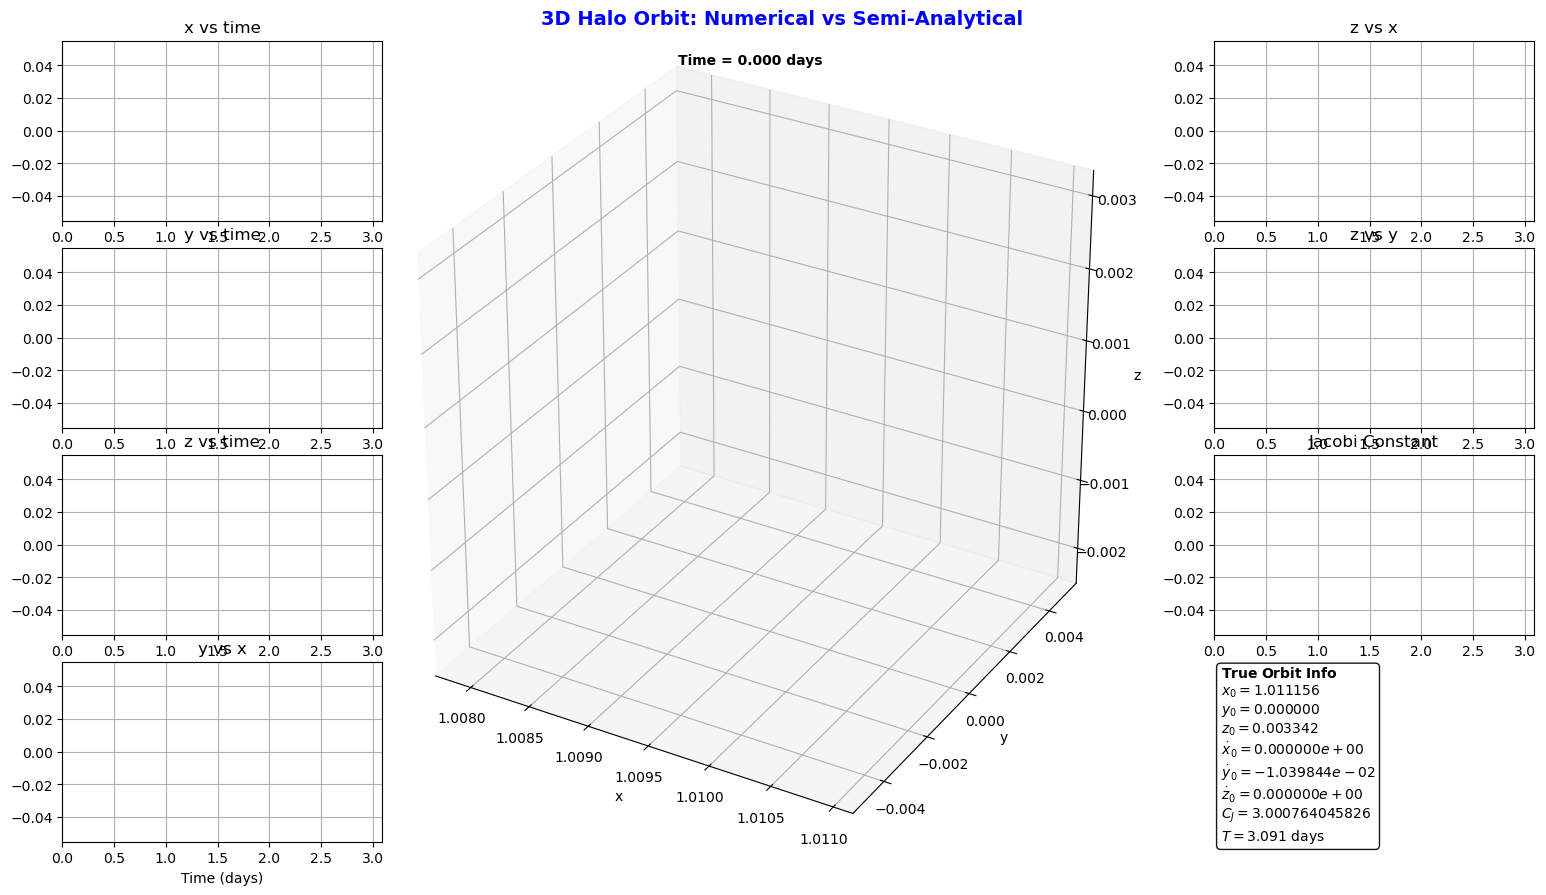

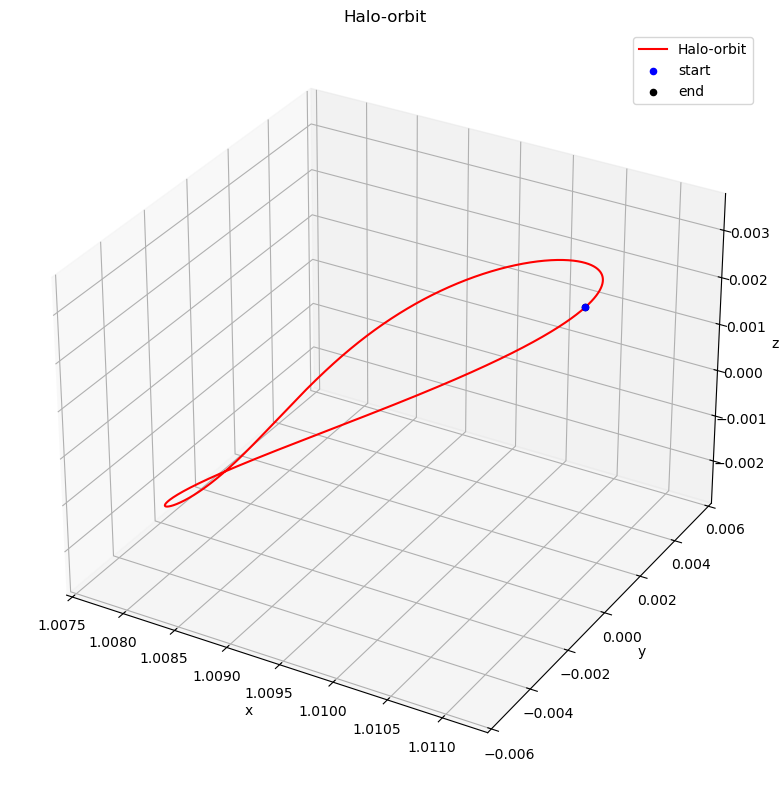

In [63]:
# plotting halo-orbit trajectory

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = r[:,0]
y = r[:,1]
z = r[:,2]   
    

ax.plot(x,y,z, label='Halo-orbit', color='red')
ax.scatter(x[0], y[0], z[0], color='blue', marker='o', label='start')
ax.scatter(x[-1], y[-1], z[-1], color='black', marker='o', label='end')

# Labels and legend

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Halo-orbit')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

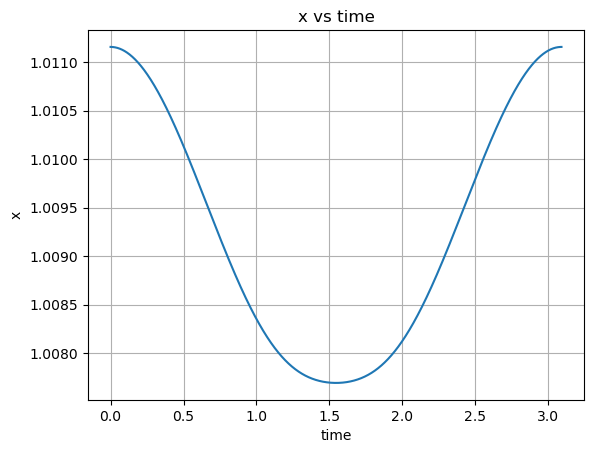

In [64]:
plt.figure()
plt.plot(time ,r[:,0])
plt.xlabel("time")
plt.ylabel("x")
plt.title("x vs time")
plt.grid()
plt.show()

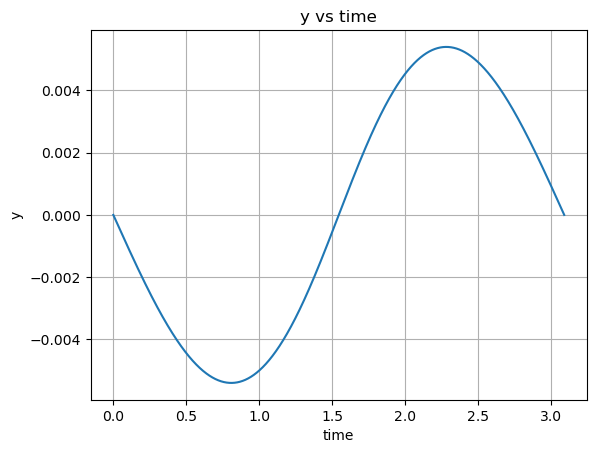

In [65]:
plt.figure()
plt.plot(time ,r[:,1])
plt.xlabel("time")
plt.ylabel("y")
plt.title("y vs time")
plt.grid()
plt.show()

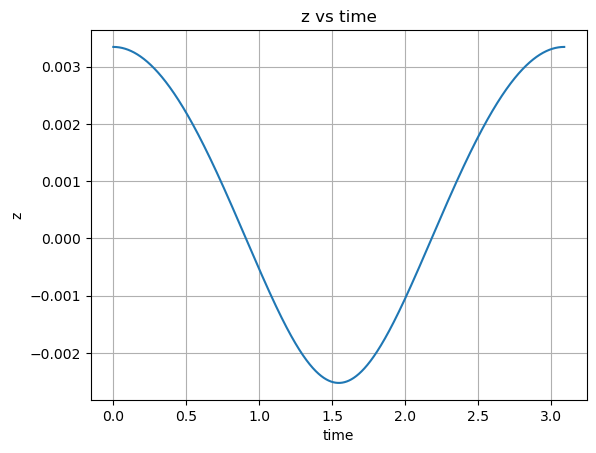

In [66]:
plt.figure()
plt.plot(time ,r[:,2])
plt.xlabel("time")
plt.ylabel("z")
plt.title("z vs time")
plt.grid()
plt.show()

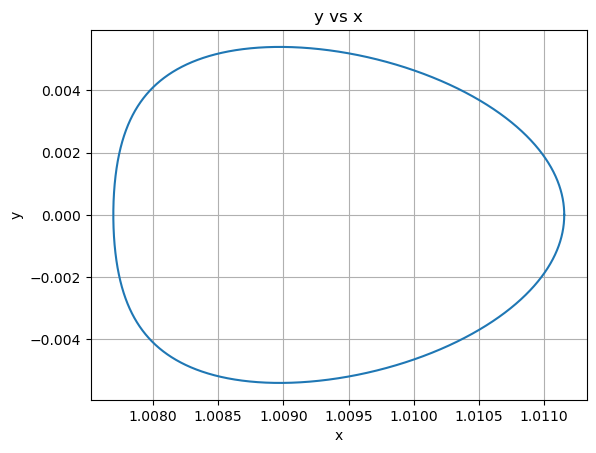

In [67]:
plt.figure()
plt.plot(r[:,0] ,r[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("y vs x")
plt.grid()
plt.show()

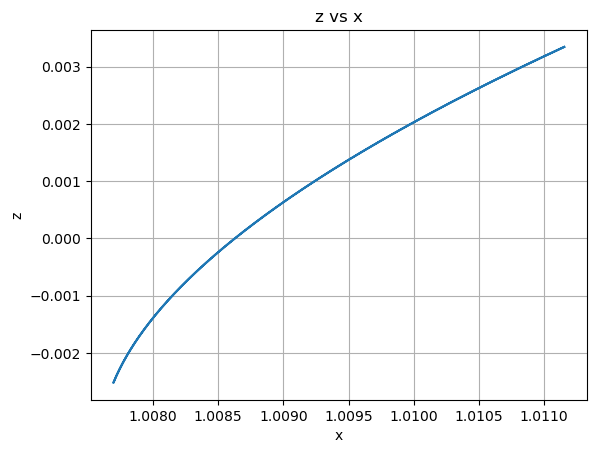

In [68]:
plt.figure()
plt.plot(r[:,0] ,r[:,2])
plt.xlabel("x")
plt.ylabel("z")
plt.title("z vs x")
plt.grid()
plt.show()

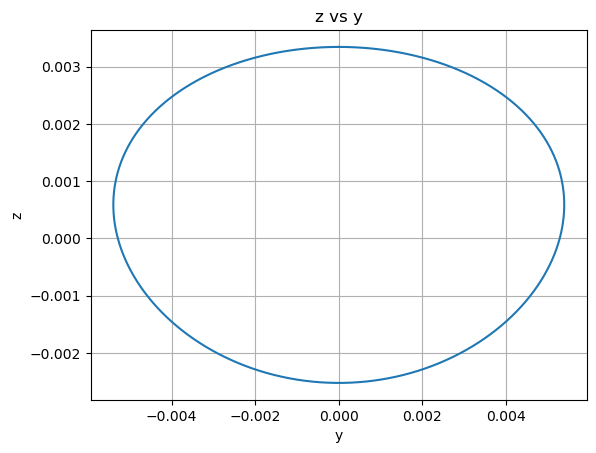

In [69]:
plt.figure()
plt.plot(r[:,1] ,r[:,2])
plt.xlabel("y")
plt.ylabel("z")
plt.title("z vs y")
plt.grid()
plt.show()

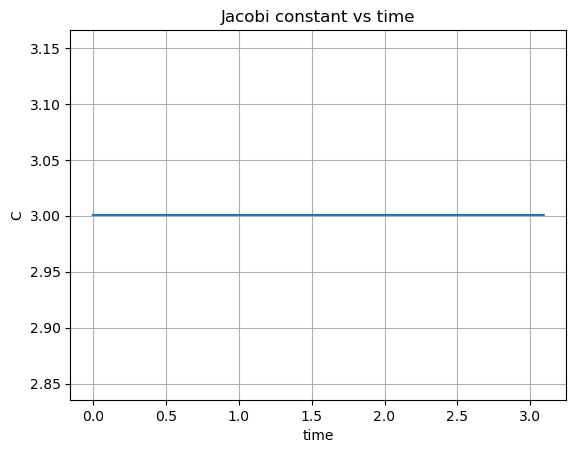

In [70]:
plt.figure()
plt.plot(time ,c_rk4)
plt.xlabel("time")
plt.ylabel("C")
plt.title("Jacobi constant vs time")
plt.grid()
plt.show()

In [17]:
import mpmath as mp

mp.mp.dps = 12

# ---------- Problem data ----------
mu = mp.mpf('3.054200000000000e-6')

x0 = mp.mpf('1.0111555695836572')
z0 = mp.mpf('3.3421700407359777e-3')
yd0 = mp.mpf('-1.0398439218275901e-2')

T = mp.mpf('3.0913102168233957')

# ---------- Time grid ----------
N = 30
tgrid = [T*i/N for i in range(N)]

# ---------- Solve m from period ----------
def solve_m(lam, m_prev):
    target = lam*T/4
    f = lambda mm: mp.ellipk(mm) - target
    return mp.findroot(f, m_prev)

# ---------- CRTBP acceleration ----------
def crtbp_acc(x,y,z,xd,yd):

    r1 = mp.sqrt((x+mu)**2 + y**2 + z**2)
    r2 = mp.sqrt((x-1+mu)**2 + y**2 + z**2)

    ax = x + 2*yd \
        - (1-mu)*(x+mu)/r1**3 \
        - mu*(x-1+mu)/r2**3

    ay = y - 2*xd \
        - (1-mu)*y/r1**3 \
        - mu*y/r2**3

    az = -(1-mu)*z/r1**3 - mu*z/r2**3

    return ax, ay, az

# ---------- Residual vector ----------
def residual(theta, m_prev):

    
    p, p2, p3, p4, p5, p6, f, f2, f3, f4, f5, f6, f7, a2, a3, a4, a5, a6, lam = theta

    # update m from period constraint
    m = solve_m(lam, m_prev)

    s = x0 - p - p2 - p3 - p4 - p5 - p6
    d = z0 - f - f2 - f3 - f4 - f5 -f6 -f7
    a = (yd0/lam) - 2*a2 - 3*a3 -4*a4 -5*a5 -6*a6

    R = []

    for t in tgrid:

        u1 = lam*t
        u2 = 2*lam*t
        u3 = 3*lam*t
        u4 = 4*lam*t
        u5 = 5*lam*t
        u6 = 6*lam*t
        u7 = 7*lam*t

        sn1 = mp.ellipfun('sn', u1, m)
        cn1 = mp.ellipfun('cn', u1, m)
        dn1 = mp.ellipfun('dn', u1, m)

        sn2 = mp.ellipfun('sn', u2, m)
        cn2 = mp.ellipfun('cn', u2, m)
        dn2 = mp.ellipfun('dn', u2, m)

        sn3 = mp.ellipfun('sn', u3, m)
        cn3 = mp.ellipfun('cn', u3, m)
        dn3 = mp.ellipfun('dn', u3, m)

        sn4 = mp.ellipfun('sn', u4, m)
        cn4 = mp.ellipfun('cn', u4, m)
        dn4 = mp.ellipfun('dn', u4, m)

        sn5 = mp.ellipfun('sn', u5, m)
        cn5 = mp.ellipfun('cn', u5, m)
        dn5 = mp.ellipfun('dn', u5, m)

        sn6 = mp.ellipfun('sn', u6, m)
        cn6 = mp.ellipfun('cn', u6, m)
        dn6 = mp.ellipfun('dn', u6, m)

        sn7 = mp.ellipfun('sn', u7, m)
        cn7 = mp.ellipfun('cn', u7, m)
        dn7 = mp.ellipfun('dn', u7, m)

        # ---------- positions ----------
        x = s + p*cn1 + p2*cn2 + p3*cn3 + p4*cn4 + p5*cn5 + p6*cn6
        y = a*sn1 + a2*sn2 + a3*sn3 + a4*sn4 + a5*sn5 + a6*sn6
        z = d + f*cn1 + f2*cn2 + f3*cn3 + f4*cn4 + f5*cn5 + f6*cn6 + f7*cn7

        # ---------- velocities ----------
        xd = -p*lam*sn1*dn1 \
             -2*p2*lam*sn2*dn2 \
             -3*p3*lam*sn3*dn3 \
             -4*p4*lam*sn4*dn4 \
             -5*p5*lam*sn5*dn5 \
             -6*p6*lam*sn6*dn6        
        
        yd = a*lam*cn1*dn1 \
             +2*a2*lam*cn2*dn2 \
             +3*a3*lam*cn3*dn3 \
             +4*a4*lam*cn4*dn4 \
             +5*a5*lam*cn5*dn5 \
             +6*a6*lam*cn6*dn6
        

        zd = -f*lam*sn1*dn1 \
             -2*f2*lam*sn2*dn2 \
             -3*f3*lam*sn3*dn3 \
             -4*f4*lam*sn4*dn4 \
             -5*f5*lam*sn5*dn5 \
             -6*f6*lam*sn6*dn6 \
             -7*f7*lam*sn7*dn7
        
        # ---------- accelerations ----------
        xdd = (
            -p*(lam**2)*cn1*(dn1**2)
            -4*p2*(lam**2)*cn2*(dn2**2)
            -9*p3*(lam**2)*cn3*(dn3**2)
            +m*p*(lam**2)*cn1*(sn1**2)
            +4*m*p2*(lam**2)*cn2*(sn2**2)
            +9*m*p3*(lam**2)*cn3*(sn3**2)
            -16*p4*(lam**2)*cn4*(dn4**2)
            +16*m*p4*(lam**2)*cn4*(sn4**2)
            -25*p5*(lam**2)*cn5*(dn5**2)
            +25*m*p5*(lam**2)*cn5*(sn5**2)
            -36*p6*(lam**2)*cn6*(dn6**2)
            +36*m*p6*(lam**2)*cn6*(sn6**2)
        )

        ydd = (
            -a*(lam**2)*(dn1**2)*sn1
            -a*m*(lam**2)*(cn1**2)*sn1
            -4*a2*(lam**2)*(dn2**2)*sn2
            -4*a2*m*(lam**2)*(cn2**2)*sn2
            -9*a3*(lam**2)*(dn3**2)*sn3
            -9*a3*m*(lam**2)*(cn3**2)*sn3
            -16*a4*(lam**2)*(dn4**2)*sn4
            -16*a4*m*(lam**2)*(cn4**2)*sn4
            -25*a5*(lam**2)*(dn5**2)*sn5
            -25*a5*m*(lam**2)*(cn5**2)*sn5
            -36*a6*(lam**2)*(dn6**2)*sn6
            -36*a6*m*(lam**2)*(cn6**2)*sn6
            
        )

        zdd = (
            -f*(lam**2)*cn1*(dn1**2)
            -4*f2*(lam**2)*cn2*(dn2**2)
            -9*f3*(lam**2)*cn3*(dn3**2)
            -16*f4*(lam**2)*cn4*(dn4**2)
            +m*f*(lam**2)*cn1*(sn1**2)
            +4*m*f2*(lam**2)*cn2*(sn2**2)
            +9*m*f3*(lam**2)*cn3*(sn3**2)
            +16*m*f4*(lam**2)*cn4*(sn4**2)
            -25*f5*(lam**2)*cn5*(dn5**2)
            +25*f5*m*(lam**2)*cn5*(sn5**2)
            -36*f6*(lam**2)*cn6*(dn6**2)
            +36*f6*m*(lam**2)*cn6*(sn6**2)
            -49*f7*(lam**2)*cn7*(dn7**2)
            +49*f7*m*(lam**2)*cn7*(sn7**2)
        )

        ax, ay, az = crtbp_acc(x,y,z,xd,yd)

        R.append(xdd - ax)
        R.append(ydd - ay)
        R.append(zdd - az)

    

    return mp.matrix(R), m

# ---------- Jacobian ----------
def jacobian(theta, m_prev):

    eps = mp.mpf('1e-6')

    R0, m_new = residual(theta, m_prev)

    mR = len(R0)
    n = len(theta)

    J = mp.zeros(mR, n)

    for j in range(n):

        step = eps*(1+abs(theta[j]))

        tp = list(theta)
        tp[j] += step

        Rp, _ = residual(tp, m_new)

        col = (Rp - R0)/step

        for i in range(mR):
            J[i,j] = col[i]

    return J, R0, m_new

# ---------- Gauss–Newton loop ----------
theta = mp.matrix([
    mp.mpf('0.0017588542516'),  #p
    mp.mpf('0.00016222254532'),   #p2
    mp.mpf('-2.90351879343e-5'),   #p3 
    mp.mpf('6.08619709084e-6'),  #p4
    mp.mpf('0.0'),  #p5
    mp.mpf('0.0'),  #p6
    mp.mpf('0.0029047709036 '),  #f
    mp.mpf('-0.000192723265721'),    # f2
    mp.mpf('2.69185313526e-5 '),    #f3 
    mp.mpf('-6.21449250048e-6 '),    #f4
    mp.mpf('1.32960882958e-6'),    #f5
    mp.mpf('0.0'),    # f6
    mp.mpf('0.0'),    # f7
    mp.mpf('0.000198448157069 '),    #a2
    mp.mpf('-3.05714131822e-5 '),    #a3
    mp.mpf('7.52129149999e-6'),    #a4
    mp.mpf('0.0'),   #a5
    mp.mpf('0.0'),   # a6
    mp.mpf('2.04725622022 ') # lamda
])

m_current = mp.mpf('0.0285103051544')

for k in range(50):

    J, R, m_current = jacobian(theta, m_current)

    JT = J.transpose()
    H = JT*J
    g = JT*R

    delta = mp.lu_solve(H, g)
    theta = theta - 0.7*delta

    cost = mp.fsum(r*r for r in R)

    print("Iter", k, "cost =", cost,
          "lambda =", theta[-1],
          "m =", m_current)

print("\nOptimized parameters:")
print(theta)
print("Final m =", m_current)


Iter 0 cost = 1.19459454159e-6 lambda = 0.0 m = 0.0285116250024
Iter 1 cost = 1.20905698421e-7 lambda = 0.0 m = 0.00868169503945
Iter 2 cost = 2.56021684768e-8 lambda = 0.0 m = 0.00426661233072
Iter 3 cost = 1.70456008271e-8 lambda = 0.0 m = 0.00305400478204
Iter 4 cost = 1.62758987102e-8 lambda = 0.0 m = 0.00269755837679
Iter 5 cost = 1.62066348671e-8 lambda = 0.0 m = 0.00259139008755
Iter 6 cost = 1.62004022053e-8 lambda = 0.0 m = 0.00256105054883
Iter 7 cost = 1.6199840583e-8 lambda = 0.0 m = 0.00255226595225
Iter 8 cost = 1.61997891985e-8 lambda = 0.0 m = 0.00255059334192
Iter 9 cost = 1.61997846457e-8 lambda = 0.0 m = 0.00254755140179
Iter 10 cost = 1.61997843003e-8 lambda = 0.0 m = 0.00254779255861
Iter 11 cost = 1.61997843677e-8 lambda = 0.0 m = 0.00254783778305
Iter 12 cost = 1.61997844436e-8 lambda = 0.0 m = 0.00254641432527
Iter 13 cost = 1.61997840591e-8 lambda = 0.0 m = 0.0025473806069
Iter 14 cost = 1.61997838378e-8 lambda = 0.0 m = 0.00254742987738
Iter 15 cost = 1.619978

In [68]:
# base orbit propogation

p = 0.00175768630107 
p2 = 0.000160278553571
p3 = -2.59836023953e-5 
p4 = 5.83972123463e-6
p5 = -1.33082382224e-6
p6 = 3.01062036278e-7
f = 0.00289861200688  
f2 = -0.000191957326079   
f3 = 3.16085711088e-5  
f4 = -6.15446699732e-6 
f5 = 1.34678639648e-6  
f6 = -2.84010566069e-7
f7 = 7.64676402887e-8
a2 = 0.000202250495678   
a3 = -3.99100273899e-5  
a4 = 8.01533814021e-6
a5 = -1.81063310189e-6
a6 = 3.90582306773e-7

lamda = 2.03382749915
m = 0.00254654532519

s = x0 - p - p2 - p3 - p4 - p5 - p6
a = (yd0/lamda) - 2*a2 - 3*a3 -4*a4 -5*a5 -6*a6
d = z0 - f - f2 - f3 - f4 - f5 - f6 - f7

rb = []
timeb = []
Cbase = []

for t in (np.arange(0,t_final,h)):

        xb = ( s + p * float(mp.re(mp.ellipfun('cn', lamda * t, m)))  
                 + p2 * float(mp.re(mp.ellipfun('cn', 2 * lamda * t, m)))  
                 + p3 * float(mp.re(mp.ellipfun('cn', 3 * lamda * t, m)))  
                 + p4 * float(mp.re(mp.ellipfun('cn', 4 * lamda * t, m))) 
                 + p5 * float(mp.re(mp.ellipfun('cn', 5 * lamda * t, m)))
                 + p6 * float(mp.re(mp.ellipfun('cn', 6 * lamda * t, m))))
             
    
        yb = ( a * float(mp.re(mp.ellipfun('sn', lamda * t, m)))  
               + a2 * float(mp.re(mp.ellipfun('sn', 2 * lamda * t, m)))  
               + a3 * float(mp.re(mp.ellipfun('sn', 3 * lamda * t, m)))  
               + a4 * float(mp.re(mp.ellipfun('sn', 4 * lamda * t, m))) 
               + a5 * float(mp.re(mp.ellipfun('sn', 5 * lamda * t, m))) 
               + a6 * float(mp.re(mp.ellipfun('sn', 6 * lamda * t, m))) )
             
             
        zb = ( d + f * float(mp.re(mp.ellipfun('cn', lamda * t, m)))  
               + f2 * float(mp.re(mp.ellipfun('cn', 2 * lamda * t, m)))  
               + f3 * float(mp.re(mp.ellipfun('cn', 3 * lamda * t, m)))  
               + f4 * float(mp.re(mp.ellipfun('cn', 4 * lamda * t, m)))  
               + f5 * float(mp.re(mp.ellipfun('cn', 5 * lamda * t, m))) 
               + f6 * float(mp.re(mp.ellipfun('cn', 6 * lamda * t, m)))
               + f7 * float(mp.re(mp.ellipfun('cn', 7 * lamda * t, m))) )
    

    
        xbd = ( -p * lamda * float(mp.re(mp.ellipfun('sn', lamda * t, m))) * float(mp.re(mp.ellipfun('dn', lamda * t, m)))  
                -2 * p2 * lamda * float(mp.re(mp.ellipfun('sn', 2 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 2 * lamda * t, m)))    
                -3 * p3 * lamda * float(mp.re(mp.ellipfun('sn', 3 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 3 * lamda * t, m)))  
                -4 * p4 * lamda * float(mp.re(mp.ellipfun('sn', 4 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 4 * lamda * t, m)))
                -5 * p5 * lamda * float(mp.re(mp.ellipfun('sn', 5 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 5 * lamda * t, m)))
                -6 * p6 * lamda * float(mp.re(mp.ellipfun('sn', 6 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 6 * lamda * t, m)))) 


        ybd = ( a * lamda * float(mp.re(mp.ellipfun('cn', lamda * t, m))) * float(mp.re(mp.ellipfun('dn', lamda * t, m)))  
                + 2 * a2 * lamda * float(mp.re(mp.ellipfun('cn', 2 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 2 * lamda * t, m)))  
                + 3 * a3 * lamda * float(mp.re(mp.ellipfun('cn', 3 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 3 * lamda * t, m)))  
                + 4 * a4 * lamda * float(mp.re(mp.ellipfun('cn', 4 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 4 * lamda * t, m)))
                + 5 * a5 * lamda * float(mp.re(mp.ellipfun('cn', 5 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 5 * lamda * t, m)))
                + 6 * a6 * lamda * float(mp.re(mp.ellipfun('cn', 6 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 6 * lamda * t, m))))


        zbd = ( -f * lamda * float(mp.re(mp.ellipfun('sn', lamda * t, m))) * float(mp.re(mp.ellipfun('dn', lamda * t, m)))  
                -2 * f2 * lamda * float(mp.re(mp.ellipfun('sn', 2 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 2 * lamda * t, m)))   
                -3 * f3 * lamda * float(mp.re(mp.ellipfun('sn', 3 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 3 * lamda * t, m)))  
                -4 * f4 * lamda * float(mp.re(mp.ellipfun('sn', 4 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 4 * lamda * t, m)))  
                -5 * f5 * lamda * float(mp.re(mp.ellipfun('sn', 5 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 5 * lamda * t, m))) 
                -6 * f6 * lamda * float(mp.re(mp.ellipfun('sn', 6 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 6 * lamda * t, m)))
                -7 * f7 * lamda * float(mp.re(mp.ellipfun('sn', 7 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 7 * lamda * t, m))))

        rho1b = np.sqrt(((xb+mu2)**2)+(yb**2)+(zb**2))

        rho2b = np.sqrt(((xb-1+mu2)**2)+(yb**2)+(zb**2))

        Cb = (xb**2) + (yb**2) + ((2*mu1)/(rho1b)) + ((2*mu2)/(rho2b)) - ((xbd**2)+(ybd**2)+(zbd**2))

        Cbase.append(Cb)
        rb.append([xb,yb,zb])
        timeb.append(t)
    
    
Cbase = np.array(Cbase)
rb = np.array(rb)  
timeb = np.array(timeb)

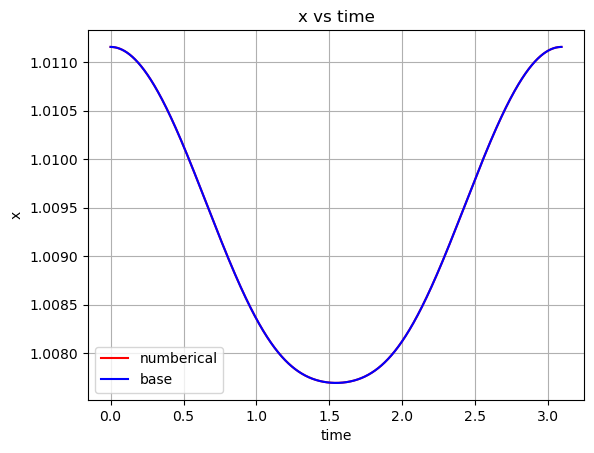

In [86]:
plt.figure()
plt.plot(time ,r[:,0],label='numberical', color='r')
plt.plot(timeb ,rb[:,0],label='base',color='b')
plt.xlabel("time")
plt.ylabel("x")
plt.title("x vs time")
plt.grid()
plt.legend()
plt.show()

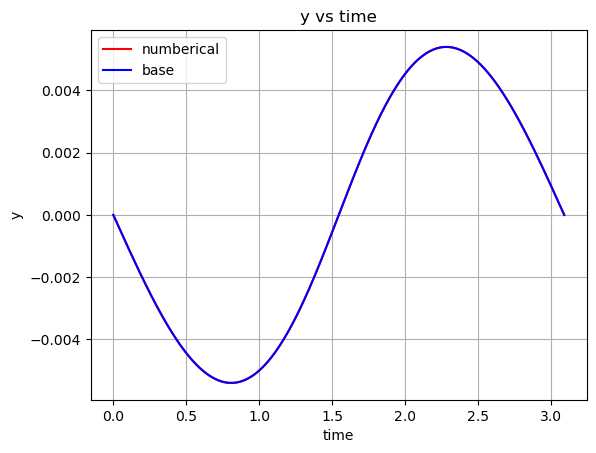

In [87]:
plt.figure()
plt.plot(time ,r[:,1],label='numberical', color='r')
plt.plot(timeb ,rb[:,1],label='base',color='b')
plt.xlabel("time")
plt.ylabel("y")
plt.title("y vs time")
plt.grid()
plt.legend()
plt.show()

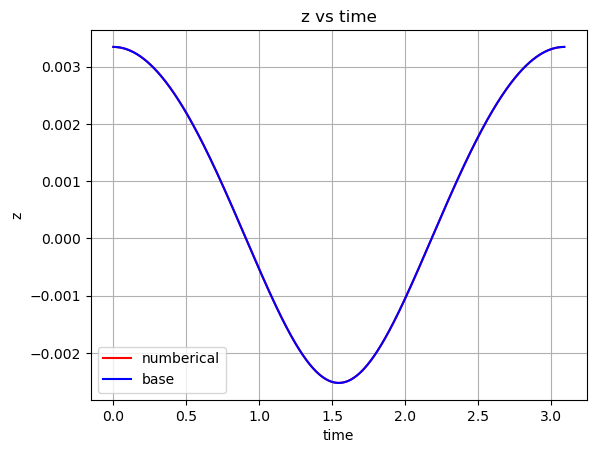

In [88]:
plt.figure()
plt.plot(time ,r[:,2],label='numberical', color='r')
plt.plot(timeb ,rb[:,2],label='base',color='b')
plt.xlabel("time")
plt.ylabel("z")
plt.title("z vs time")
plt.grid()
plt.legend()
plt.show()

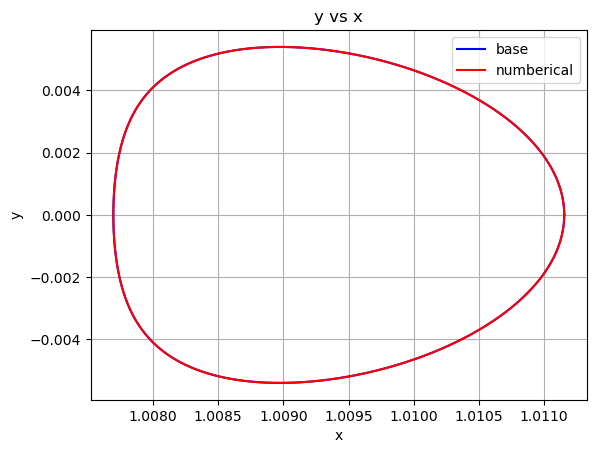

In [89]:
plt.figure()
plt.plot(rb[:,0] ,rb[:,1],label='base',color='b')
plt.plot(r[:,0] ,r[:,1],label='numberical', color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("y vs x")
plt.grid()
plt.legend()
plt.show()

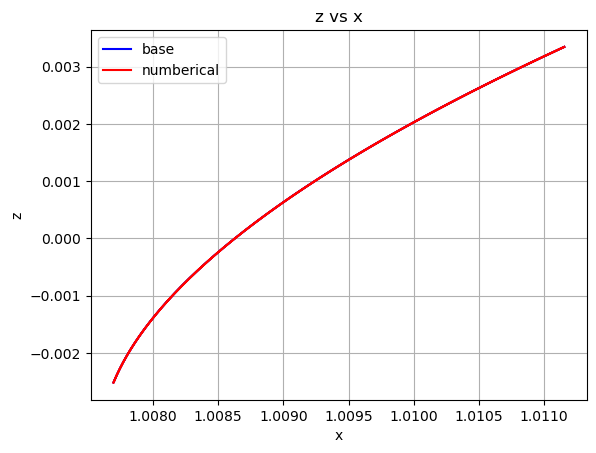

In [90]:
plt.figure()
plt.plot(rb[:,0] ,rb[:,2],label='base',color='b')
plt.plot(r[:,0] ,r[:,2],label='numberical', color='r')
plt.xlabel("x")
plt.ylabel("z")
plt.title("z vs x")
plt.grid()
plt.legend()
plt.show()

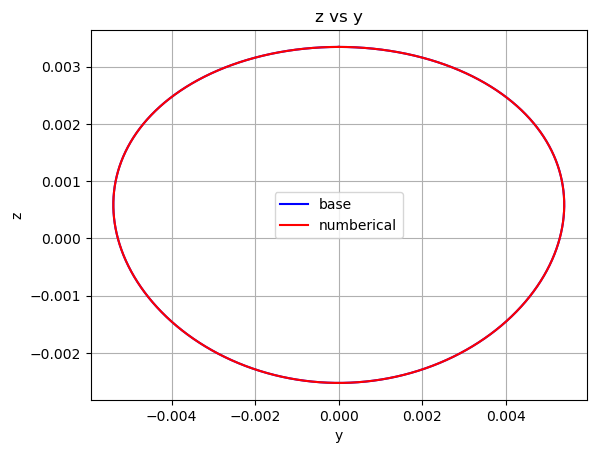

In [91]:
plt.figure()
plt.plot(rb[:,1] ,rb[:,2],label='base',color='b')
plt.plot(r[:,1] ,r[:,2],label='numberical', color='r')
plt.xlabel("y")
plt.ylabel("z")
plt.title("z vs y")
plt.grid()
plt.legend()
plt.show()

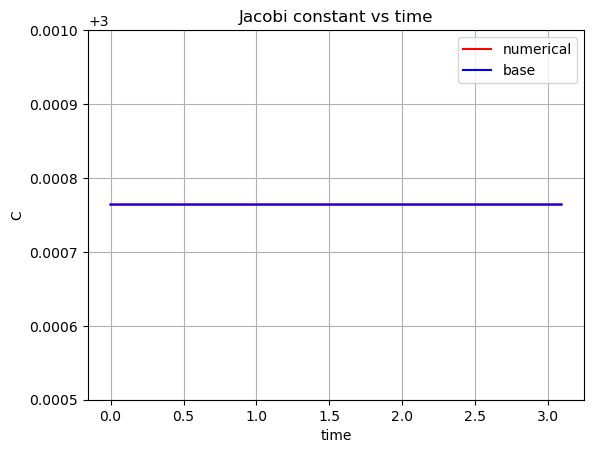

In [92]:
plt.figure()
plt.plot(time ,c_rk4, label='numerical', color='r')
plt.plot(timeb ,Cbase, label='base',color='b')
plt.xlabel("time")
plt.ylabel("C")
plt.title("Jacobi constant vs time")
plt.legend()
plt.ylim(3.0005, 3.001)
plt.grid()
plt.show()

In [93]:
rb=rb.astype(float)


In [94]:
rb

array([[ 1.01115557e+00, -4.37516099e-22,  3.34217004e-03],
       [ 1.01115557e+00, -1.03984392e-06,  3.34216999e-03],
       [ 1.01115557e+00, -2.07968779e-06,  3.34216985e-03],
       ...,
       [ 1.01115557e+00,  2.18298121e-06,  3.34216983e-03],
       [ 1.01115557e+00,  1.14313734e-06,  3.34216998e-03],
       [ 1.01115557e+00,  1.03293424e-07,  3.34217004e-03]])

In [95]:
r

array([[ 1.01115557e+00,  0.00000000e+00,  3.34217004e-03],
       [ 1.01115557e+00, -1.03984392e-06,  3.34216999e-03],
       [ 1.01115557e+00, -2.07968779e-06,  3.34216985e-03],
       ...,
       [ 1.01115557e+00,  2.18592626e-06,  3.34216983e-03],
       [ 1.01115557e+00,  1.14608239e-06,  3.34216998e-03],
       [ 1.01115557e+00,  1.06238475e-07,  3.34217004e-03]])

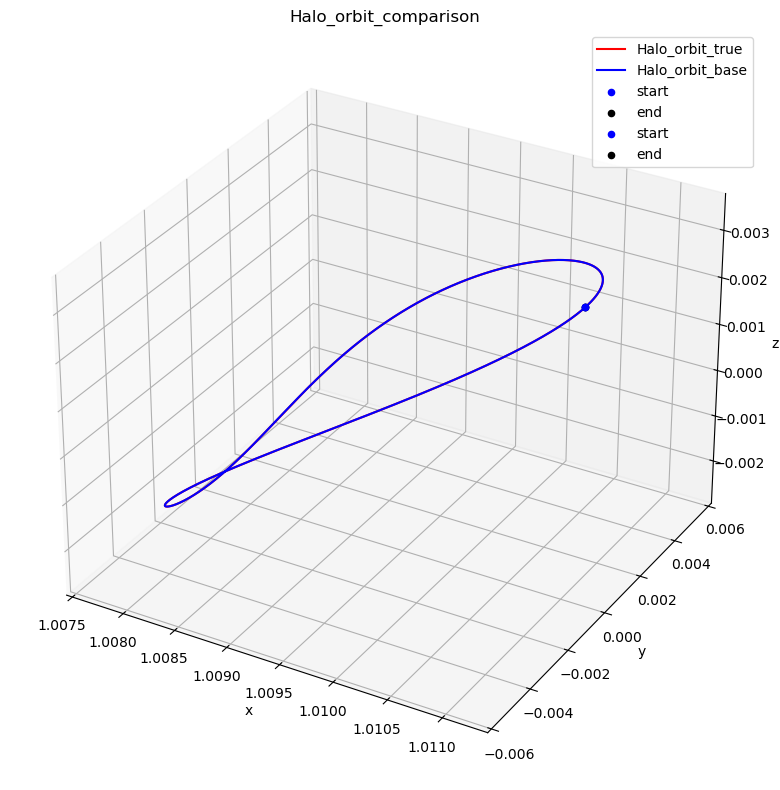

In [96]:
# plotting halo-orbit trajectory

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xb = rb[:,0]
yb = rb[:,1]
zb = rb[:,2]   

x = r[:,0]
y = r[:,1]
z = r[:,2] 
    

ax.plot(x,y,z, label='Halo_orbit_true', color='red')
ax.plot(xb,yb,zb, label='Halo_orbit_base', color='blue')

ax.scatter(x[0], y[0], z[0], color='blue', marker='o', label='start')
ax.scatter(x[-1], y[-1], z[-1], color='black', marker='o', label='end')

ax.scatter(xb[0], yb[0], zb[0], color='blue', marker='o', label='start')
ax.scatter(xb[-1], yb[-1], zb[-1], color='black', marker='o', label='end')

# Labels and legend

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Halo_orbit_comparison')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [97]:
np.abs((xb-x)).max()

np.float64(2.9363597131570884e-07)

In [98]:
np.abs((yb-y)).max()

np.float64(4.4358109381730654e-07)

In [99]:
np.abs((zb-z)).max()

np.float64(5.476879015608484e-08)

In [100]:
np.abs((Cbase-c_rk4)).max()

mpf('5.58444765985655e-8')

In [37]:
import mpmath as mp

mp.mp.dps = 12

# ---------- Problem data ----------
mu = mp.mpf('3.054200000000000e-6')

x0 = mp.mpf('1.0111555695836572')
z0 = mp.mpf('3.3421700407359777e-3')
yd0 = mp.mpf('-1.0398439218275901e-2')

T = mp.mpf('3.0913102168233957')

# ---------- Time grid ----------
N = 30
tgrid = [T*i/N for i in range(N)]

# ---------- Solve m from period ----------
def solve_m(lam, m_prev):
    target = lam*T/4
    f = lambda mm: mp.ellipk(mm) - target
    return mp.findroot(f, m_prev)

# ---------- CRTBP acceleration ----------
def crtbp_acc(x,y,z,xd,yd):

    r1 = mp.sqrt((x+mu)**2 + y**2 + z**2)
    r2 = mp.sqrt((x-1+mu)**2 + y**2 + z**2)

    ax = x + 2*yd \
        - (1-mu)*(x+mu)/r1**3 \
        - mu*(x-1+mu)/r2**3

    ay = y - 2*xd \
        - (1-mu)*y/r1**3 \
        - mu*y/r2**3

    az = -(1-mu)*z/r1**3 - mu*z/r2**3

    return ax, ay, az

# ---------- Residual vector ----------
def residual(theta, m_prev):

    (
        p, p2, p3, p4, p5, p6, p7, p8, p9, p10,
        f, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11,
        a2, a3, a4, a5, a6, a7, a8, a9, a10,
        lam
    ) = theta

    m = solve_m(lam, m_prev)

    s = x0 - p - p2 - p3 - p4 - p5 - p6 - p7 - p8 - p9 - p10
    d = z0 - f - f2 - f3 - f4 - f5 - f6 - f7 - f8 - f9 - f10 - f11
    a = (yd0/lam) \
        - 2*a2 - 3*a3 - 4*a4 - 5*a5 - 6*a6 \
        - 7*a7 - 8*a8 - 9*a9 - 10*a10

    R = []

    for t in tgrid:

        u1  = lam*t
        u2  = 2*lam*t
        u3  = 3*lam*t
        u4  = 4*lam*t
        u5  = 5*lam*t
        u6  = 6*lam*t
        u7  = 7*lam*t
        u8  = 8*lam*t
        u9  = 9*lam*t
        u10 = 10*lam*t
        u11 = 11*lam*t

        sn1,  cn1,  dn1  = mp.ellipfun('sn',u1,m),  mp.ellipfun('cn',u1,m),  mp.ellipfun('dn',u1,m)
        sn2,  cn2,  dn2  = mp.ellipfun('sn',u2,m),  mp.ellipfun('cn',u2,m),  mp.ellipfun('dn',u2,m)
        sn3,  cn3,  dn3  = mp.ellipfun('sn',u3,m),  mp.ellipfun('cn',u3,m),  mp.ellipfun('dn',u3,m)
        sn4,  cn4,  dn4  = mp.ellipfun('sn',u4,m),  mp.ellipfun('cn',u4,m),  mp.ellipfun('dn',u4,m)
        sn5,  cn5,  dn5  = mp.ellipfun('sn',u5,m),  mp.ellipfun('cn',u5,m),  mp.ellipfun('dn',u5,m)
        sn6,  cn6,  dn6  = mp.ellipfun('sn',u6,m),  mp.ellipfun('cn',u6,m),  mp.ellipfun('dn',u6,m)
        sn7,  cn7,  dn7  = mp.ellipfun('sn',u7,m),  mp.ellipfun('cn',u7,m),  mp.ellipfun('dn',u7,m)
        sn8,  cn8,  dn8  = mp.ellipfun('sn',u8,m),  mp.ellipfun('cn',u8,m),  mp.ellipfun('dn',u8,m)
        sn9,  cn9,  dn9  = mp.ellipfun('sn',u9,m),  mp.ellipfun('cn',u9,m),  mp.ellipfun('dn',u9,m)
        sn10, cn10, dn10 = mp.ellipfun('sn',u10,m), mp.ellipfun('cn',u10,m), mp.ellipfun('dn',u10,m)
        sn11, cn11, dn11 = mp.ellipfun('sn',u11,m), mp.ellipfun('cn',u11,m), mp.ellipfun('dn',u11,m)

        # ---------- positions ----------
        x = s + p*cn1 + p2*cn2 + p3*cn3 + p4*cn4 + p5*cn5 + p6*cn6 + p7*cn7 + p8*cn8 + p9*cn9 + p10*cn10
        y = a*sn1 + a2*sn2 + a3*sn3 + a4*sn4 + a5*sn5 + a6*sn6 + a7*sn7 + a8*sn8 + a9*sn9 + a10*sn10
        z = d + f*cn1 + f2*cn2 + f3*cn3 + f4*cn4 + f5*cn5 + f6*cn6 + f7*cn7 + f8*cn8 + f9*cn9 + f10*cn10 + f11*cn11

        # ---------- velocities ----------
        xd = -lam*(p*sn1*dn1 + 2*p2*sn2*dn2 + 3*p3*sn3*dn3 + 4*p4*sn4*dn4 + 5*p5*sn5*dn5 +
                   6*p6*sn6*dn6 + 7*p7*sn7*dn7 + 8*p8*sn8*dn8 + 9*p9*sn9*dn9 + 10*p10*sn10*dn10)

        yd = lam*(a*cn1*dn1 + 2*a2*cn2*dn2 + 3*a3*cn3*dn3 + 4*a4*cn4*dn4 + 5*a5*cn5*dn5 +
                  6*a6*cn6*dn6 + 7*a7*cn7*dn7 + 8*a8*cn8*dn8 + 9*a9*cn9*dn9 + 10*a10*cn10*dn10)

        zd = -lam*(f*sn1*dn1 + 2*f2*sn2*dn2 + 3*f3*sn3*dn3 + 4*f4*sn4*dn4 + 5*f5*sn5*dn5 +
                   6*f6*sn6*dn6 + 7*f7*sn7*dn7 + 8*f8*sn8*dn8 + 9*f9*sn9*dn9 + 10*f10*sn10*dn10 + 11*f11*sn11*dn11)

        # ---------- accelerations (FULLY EXTENDED) ----------
        xdd = (
            - (lam**2) * (
                p*cn1*((dn1**2) - m*sn1**2)
              + 4*p2*cn2*((dn2**2) - m*sn2**2)
              + 9*p3*cn3*((dn3**2) - m*sn3**2)
              + 16*p4*cn4*((dn4**2) - m*sn4**2)
              + 25*p5*cn5*((dn5**2) - m*sn5**2)
              + 36*p6*cn6*((dn6**2) - m*sn6**2)
              + 49*p7*cn7*((dn7**2) - m*sn7**2)
              + 64*p8*cn8*((dn8**2) - m*sn8**2)
              + 81*p9*cn9*((dn9**2) - m*sn9**2)
              + 100*p10*cn10*((dn10**2) - m*sn10**2)
            )
        )

        ydd = (
            - (lam**2) * (
                a*sn1*((dn1**2) + m*cn1**2)
              + 4*a2*sn2*((dn2**2) + m*cn2**2)
              + 9*a3*sn3*((dn3**2) + m*cn3**2)
              + 16*a4*sn4*((dn4**2) + m*cn4**2)
              + 25*a5*sn5*((dn5**2) + m*cn5**2)
              + 36*a6*sn6*((dn6**2) + m*cn6**2)
              + 49*a7*sn7*((dn7**2) + m*cn7**2)
              + 64*a8*sn8*((dn8**2) + m*cn8**2)
              + 81*a9*sn9*((dn9**2) + m*cn9**2)
              + 100*a10*sn10*((dn10**2) + m*cn10**2)
            )
        )

        zdd = (
            - (lam**2) * (
                f*cn1*((dn1**2) - m*sn1**2)
              + 4*f2*cn2*((dn2**2) - m*sn2**2)
              + 9*f3*cn3*((dn3**2) - m*sn3**2)
              + 16*f4*cn4*((dn4**2) - m*sn4**2)
              + 25*f5*cn5*((dn5**2) - m*sn5**2)
              + 36*f6*cn6*((dn6**2) - m*sn6**2)
              + 49*f7*cn7*((dn7**2) - m*sn7**2)
              + 64*f8*cn8*((dn8**2) - m*sn8**2)
              + 81*f9*cn9*((dn9**2) - m*sn9**2)
              + 100*f10*cn10*((dn10**2) - m*sn10**2)
              + 121*f11*cn11*((dn11**2) - m*sn11**2)
            )
        )

        ax, ay, az = crtbp_acc(x,y,z,xd,yd)

        R.append(xdd - ax)
        R.append(ydd - ay)
        R.append(zdd - az)

    return mp.matrix(R), m

# ---------- Jacobian ----------
def jacobian(theta, m_prev):

    eps = mp.mpf('1e-6')

    R0, m_new = residual(theta, m_prev)

    mR = len(R0)
    n = len(theta)

    J = mp.zeros(mR, n)

    for j in range(n):
        step = eps*(1+abs(theta[j]))
        tp = list(theta)
        tp[j] += step
        Rp, _ = residual(tp, m_new)
        for i in range(mR):
            J[i,j] = (Rp[i] - R0[i]) / step

    return J, R0, m_new

# ---------- Gauss–Newton loop ----------

theta = mp.matrix([
    mp.mpf('0.00175768630107'),         # p
    mp.mpf('0.000160278553571'),        # p2
    mp.mpf('-2.59836023953e-5'),        # p3
    mp.mpf('5.83972123463e-6'),         # p4
    mp.mpf('-1.33082382224e-6'),   # p5
    mp.mpf('3.01062036278e-7'),    # p6
    mp.mpf('0.0'),                      # p7
    mp.mpf('0.0'),                      # p8
    mp.mpf('0.0'),                      # p9
    mp.mpf('0.0'),                      # p10

    mp.mpf('0.00289861200688'),       # f
    mp.mpf('-0.000191957326079'),     # f2
    mp.mpf('3.16085711088e-5'),       # f3
    mp.mpf('-6.15446699732e-6'),      # f4
    mp.mpf('1.34678639648e-6'),       # f5
    mp.mpf('-2.84010566069e-7'),      # f6
    mp.mpf('7.64676402887e-8'),       # f7
    mp.mpf('0.0'),        # f8
    mp.mpf('0.0'),        # f9
    mp.mpf('0.0'),        # f10
    mp.mpf('0.0'),        # f11

    mp.mpf('0.000202250495678'),        # a2
    mp.mpf('-3.99100273899e-5'),        # a3
    mp.mpf('8.01533814021e-6'),         # a4
    mp.mpf('-1.81063310189e-6'),        # a5
    mp.mpf('3.90582306773e-7'),         # a6
    mp.mpf('0.0'),        # a7
    mp.mpf('0.0'),        # a8
    mp.mpf('0.0'),        # a9
    mp.mpf('0.0'),        # a10

    mp.mpf('2.03382749915')     # lambda
])

m_current = mp.mpf('0.00254654532519')

for k in range(50):

    J, R, m_current = jacobian(theta, m_current)

    JT = J.transpose()
    H = JT*J
    g = JT*R

    delta = mp.lu_solve(H, g)
    theta = theta - 0.7*delta

    cost = mp.fsum(r*r for r in R)

    print("Iter", k, "cost =", cost,
          "lambda =", theta[-1],
          "m =", m_current)

print("\nOptimized parameters:")
print(theta)
print("Final m =", m_current)


Iter 0 cost = 1.61997844796e-8 lambda = 0.0 m = 0.00254691104881
Iter 1 cost = 1.45977507788e-9 lambda = 0.0 m = 0.000932344555243
Iter 2 cost = 1.33041106239e-10 lambda = 0.0 m = 0.000446565236171
Iter 3 cost = 1.36292951113e-11 lambda = 0.0 m = 0.00030046579344
Iter 4 cost = 2.88149610049e-12 lambda = 0.0 m = 0.000256656517229
Iter 5 cost = 1.9141671298e-12 lambda = 0.0 m = 0.000243635094854
Iter 6 cost = 1.82710686445e-12 lambda = 0.0 m = 0.000239750887686
Iter 7 cost = 1.81926275151e-12 lambda = 0.0 m = 0.00023864060857
Iter 8 cost = 1.81855889497e-12 lambda = 0.0 m = 0.000238163527484
Iter 9 cost = 1.81849728813e-12 lambda = 0.0 m = 0.000238005646323
Iter 10 cost = 1.81849519604e-12 lambda = 0.0 m = 0.000238019076159
Iter 11 cost = 1.81849447537e-12 lambda = 0.0 m = 0.000238005700734
Iter 12 cost = 1.81849014015e-12 lambda = 0.0 m = 0.000238053361282
Iter 13 cost = 1.81848952413e-12 lambda = 0.0 m = 0.000237989400395
Iter 14 cost = 1.81849042427e-12 lambda = 0.0 m = 0.000237966917

In [101]:
# p coefficients
p  = 0.00175740077997
p2 = 0.000160192648267
p3 = -2.57151021857e-5
p4 = 5.83098020515e-6
p5 = -1.32373750369e-6
p6 = 3.17070219002e-7
p7 = -7.95125942351e-8
p8 = 2.03443504276e-8
p9 = -4.92821454412e-9
p10 = 1.41978988605e-9

# f coefficients
f  = 0.00289820722046
f2 = -0.000191907446374
f3 = 3.20167210103e-5
f4 = -6.14972549968e-6
f5 = 1.34390888327e-6
f6 = -3.09361357608e-7
f7 = 7.60292004365e-8
f8 = -1.91247982262e-8
f9 = 4.45181468934e-9
f10 = -1.2998374412e-9
f11 = 3.47143228713e-10

# a coefficients
a2  = 0.000202343392538
a3  = -4.06997316661e-5
a4  = 8.02827467983e-6
a5  = -1.81732573469e-6
a6  = 4.27786616942e-7
a7  = -1.06578733526e-7
a8  = 2.71180460101e-8
a9  = -6.45944542611e-9
a10 = 1.86188661237e-9


lamda = 2.03265240365
m = 0.000237927204409

s = x0 - p - p2 - p3 - p4 - p5 - p6 - p7 - p8 - p9 - p10
a = (yd0/lamda) \
        - 2*a2 - 3*a3 - 4*a4 - 5*a5 - 6*a6 \
        - 7*a7 - 8*a8 - 9*a9 - 10*a10
d = z0 - f - f2 - f3 - f4 - f5 - f6 - f7 - f8 - f9 - f10 - f11

rb = []
timeb = []
Cbase = []

for t in (np.arange(0,t_final,h)):
    

    xb = ( s
       + p  * float(mp.re(mp.ellipfun('cn', 1  * lamda * t, m)))
       + p2 * float(mp.re(mp.ellipfun('cn', 2  * lamda * t, m)))
       + p3 * float(mp.re(mp.ellipfun('cn', 3  * lamda * t, m)))
       + p4 * float(mp.re(mp.ellipfun('cn', 4  * lamda * t, m)))
       + p5 * float(mp.re(mp.ellipfun('cn', 5  * lamda * t, m)))
       + p6 * float(mp.re(mp.ellipfun('cn', 6  * lamda * t, m)))
       + p7 * float(mp.re(mp.ellipfun('cn', 7  * lamda * t, m)))
       + p8 * float(mp.re(mp.ellipfun('cn', 8  * lamda * t, m)))
       + p9 * float(mp.re(mp.ellipfun('cn', 9  * lamda * t, m)))
       + p10* float(mp.re(mp.ellipfun('cn', 10 * lamda * t, m)))
     )



             
    
    yb = ( a  * float(mp.re(mp.ellipfun('sn', 1  * lamda * t, m)))
       + a2 * float(mp.re(mp.ellipfun('sn', 2  * lamda * t, m)))
       + a3 * float(mp.re(mp.ellipfun('sn', 3  * lamda * t, m)))
       + a4 * float(mp.re(mp.ellipfun('sn', 4  * lamda * t, m)))
       + a5 * float(mp.re(mp.ellipfun('sn', 5  * lamda * t, m)))
       + a6 * float(mp.re(mp.ellipfun('sn', 6  * lamda * t, m)))
       + a7 * float(mp.re(mp.ellipfun('sn', 7  * lamda * t, m)))
       + a8 * float(mp.re(mp.ellipfun('sn', 8  * lamda * t, m)))
       + a9 * float(mp.re(mp.ellipfun('sn', 9  * lamda * t, m)))
       + a10* float(mp.re(mp.ellipfun('sn', 10 * lamda * t, m)))
     )

             
             
    zb = ( d
       + f  * float(mp.re(mp.ellipfun('cn', 1  * lamda * t, m)))
       + f2 * float(mp.re(mp.ellipfun('cn', 2  * lamda * t, m)))
       + f3 * float(mp.re(mp.ellipfun('cn', 3  * lamda * t, m)))
       + f4 * float(mp.re(mp.ellipfun('cn', 4  * lamda * t, m)))
       + f5 * float(mp.re(mp.ellipfun('cn', 5  * lamda * t, m)))
       + f6 * float(mp.re(mp.ellipfun('cn', 6  * lamda * t, m)))
       + f7 * float(mp.re(mp.ellipfun('cn', 7  * lamda * t, m)))
       + f8 * float(mp.re(mp.ellipfun('cn', 8  * lamda * t, m)))
       + f9 * float(mp.re(mp.ellipfun('cn', 9  * lamda * t, m)))
       + f10* float(mp.re(mp.ellipfun('cn', 10 * lamda * t, m)))
       + f11* float(mp.re(mp.ellipfun('cn', 11 * lamda * t, m)))
     )

    

    
    xbd = ( -1  * p  * lamda * float(mp.re(mp.ellipfun('sn', 1  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 1  * lamda * t, m)))
        -2  * p2 * lamda * float(mp.re(mp.ellipfun('sn', 2  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 2  * lamda * t, m)))
        -3  * p3 * lamda * float(mp.re(mp.ellipfun('sn', 3  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 3  * lamda * t, m)))
        -4  * p4 * lamda * float(mp.re(mp.ellipfun('sn', 4  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 4  * lamda * t, m)))
        -5  * p5 * lamda * float(mp.re(mp.ellipfun('sn', 5  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 5  * lamda * t, m)))
        -6  * p6 * lamda * float(mp.re(mp.ellipfun('sn', 6  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 6  * lamda * t, m)))
        -7  * p7 * lamda * float(mp.re(mp.ellipfun('sn', 7  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 7  * lamda * t, m)))
        -8  * p8 * lamda * float(mp.re(mp.ellipfun('sn', 8  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 8  * lamda * t, m)))
        -9  * p9 * lamda * float(mp.re(mp.ellipfun('sn', 9  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 9  * lamda * t, m)))
        -10 * p10* lamda * float(mp.re(mp.ellipfun('sn', 10 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 10 * lamda * t, m)))
      )


    ybd = (  1  * a  * lamda * float(mp.re(mp.ellipfun('cn', 1  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 1  * lamda * t, m)))
        +2  * a2 * lamda * float(mp.re(mp.ellipfun('cn', 2  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 2  * lamda * t, m)))
        +3  * a3 * lamda * float(mp.re(mp.ellipfun('cn', 3  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 3  * lamda * t, m)))
        +4  * a4 * lamda * float(mp.re(mp.ellipfun('cn', 4  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 4  * lamda * t, m)))
        +5  * a5 * lamda * float(mp.re(mp.ellipfun('cn', 5  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 5  * lamda * t, m)))
        +6  * a6 * lamda * float(mp.re(mp.ellipfun('cn', 6  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 6  * lamda * t, m)))
        +7  * a7 * lamda * float(mp.re(mp.ellipfun('cn', 7  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 7  * lamda * t, m)))
        +8  * a8 * lamda * float(mp.re(mp.ellipfun('cn', 8  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 8  * lamda * t, m)))
        +9  * a9 * lamda * float(mp.re(mp.ellipfun('cn', 9  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 9  * lamda * t, m)))
        +10 * a10* lamda * float(mp.re(mp.ellipfun('cn', 10 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 10 * lamda * t, m)))
      )



    zbd = ( -1  * f  * lamda * float(mp.re(mp.ellipfun('sn', 1  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 1  * lamda * t, m)))
        -2  * f2 * lamda * float(mp.re(mp.ellipfun('sn', 2  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 2  * lamda * t, m)))
        -3  * f3 * lamda * float(mp.re(mp.ellipfun('sn', 3  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 3  * lamda * t, m)))
        -4  * f4 * lamda * float(mp.re(mp.ellipfun('sn', 4  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 4  * lamda * t, m)))
        -5  * f5 * lamda * float(mp.re(mp.ellipfun('sn', 5  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 5  * lamda * t, m)))
        -6  * f6 * lamda * float(mp.re(mp.ellipfun('sn', 6  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 6  * lamda * t, m)))
        -7  * f7 * lamda * float(mp.re(mp.ellipfun('sn', 7  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 7  * lamda * t, m)))
        -8  * f8 * lamda * float(mp.re(mp.ellipfun('sn', 8  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 8  * lamda * t, m)))
        -9  * f9 * lamda * float(mp.re(mp.ellipfun('sn', 9  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 9  * lamda * t, m)))
        -10 * f10* lamda * float(mp.re(mp.ellipfun('sn', 10 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 10 * lamda * t, m)))
        -11 * f11* lamda * float(mp.re(mp.ellipfun('sn', 11 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 11 * lamda * t, m)))
      )


    rho1b = np.sqrt(((xb+mu2)**2)+(yb**2)+(zb**2))

    rho2b = np.sqrt(((xb-1+mu2)**2)+(yb**2)+(zb**2))

    Cb = (xb**2) + (yb**2) + ((2*mu1)/(rho1b)) + ((2*mu2)/(rho2b)) - ((xbd**2)+(ybd**2)+(zbd**2))

    Cbase.append(Cb)
    rb.append([xb,yb,zb])
    timeb.append(t)
    
    
Cbase = np.array(Cbase)
rb = np.array(rb)  
timeb = np.array(timeb)

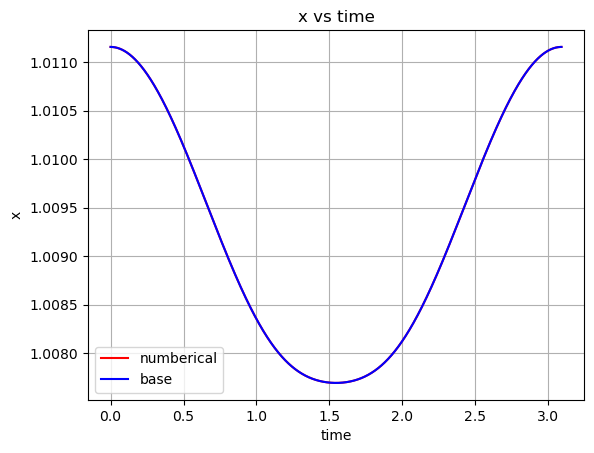

In [102]:
plt.figure()
plt.plot(time ,r[:,0],label='numberical', color='r')
plt.plot(timeb ,rb[:,0],label='base',color='b')
plt.xlabel("time")
plt.ylabel("x")
plt.title("x vs time")
plt.grid()
plt.legend()
plt.show()

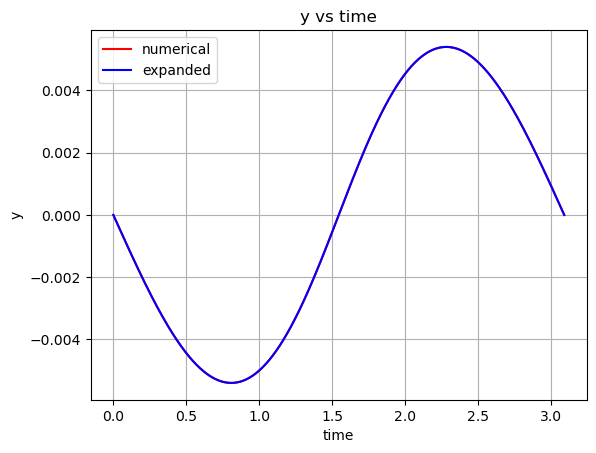

In [103]:
plt.figure()
plt.plot(time ,r[:,1],label='numerical', color='r')
plt.plot(timeb ,rb[:,1],label='expanded',color='b')
plt.xlabel("time")
plt.ylabel("y")
plt.title("y vs time")
plt.grid()
plt.legend()
plt.show()

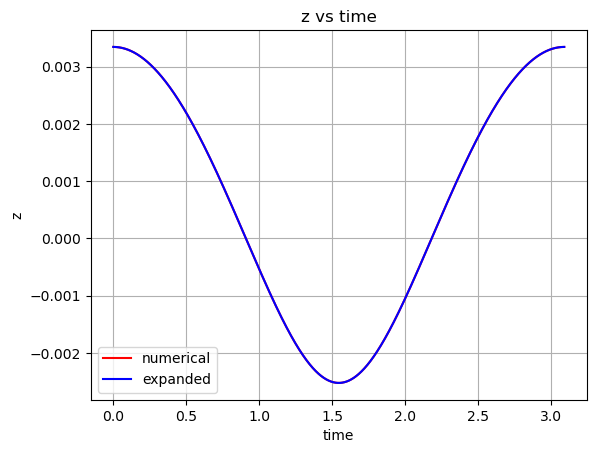

In [104]:
plt.figure()
plt.plot(time ,r[:,2],label='numerical', color='r')
plt.plot(timeb ,rb[:,2],label='expanded',color='b')
plt.xlabel("time")
plt.ylabel("z")
plt.title("z vs time")
plt.grid()
plt.legend()
plt.show()

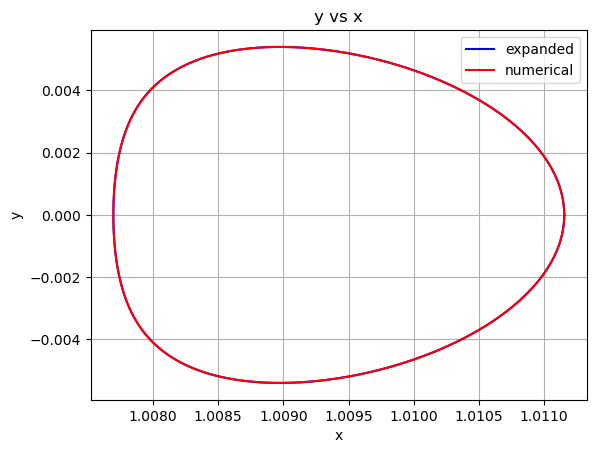

In [105]:
plt.figure()
plt.plot(rb[:,0] ,rb[:,1],label='expanded',color='b')
plt.plot(r[:,0] ,r[:,1],label='numerical', color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("y vs x")
plt.grid()
plt.legend()
plt.show()

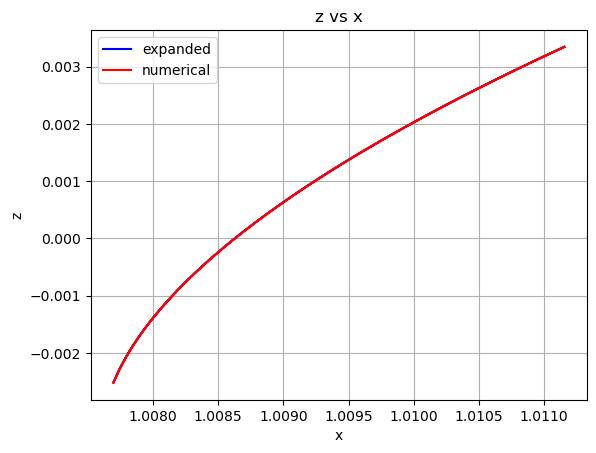

In [106]:
plt.figure()
plt.plot(rb[:,0] ,rb[:,2],label='expanded',color='b')
plt.plot(r[:,0] ,r[:,2],label='numerical', color='r')
plt.xlabel("x")
plt.ylabel("z")
plt.title("z vs x")
plt.grid()
plt.legend()
plt.show()

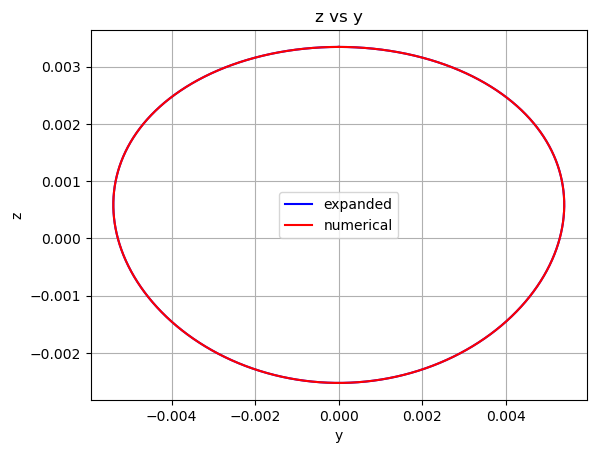

In [107]:
plt.figure()
plt.plot(rb[:,1] ,rb[:,2],label='expanded',color='b')
plt.plot(r[:,1] ,r[:,2],label='numerical', color='r')
plt.xlabel("y")
plt.ylabel("z")
plt.title("z vs y")
plt.grid()
plt.legend()
plt.show()

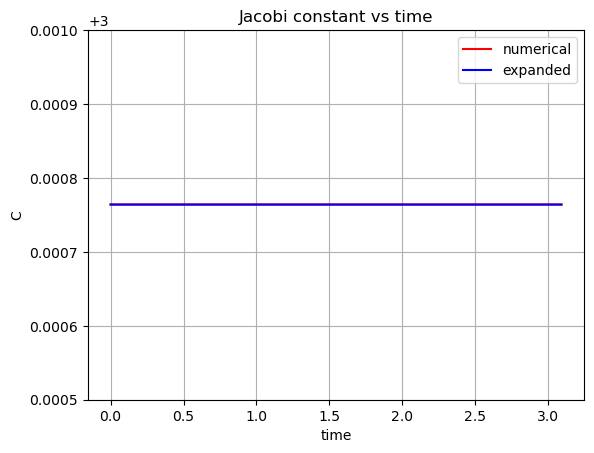

In [108]:
plt.figure()
plt.plot(time ,c_rk4, label='numerical', color='r')
plt.plot(timeb ,Cbase, label='expanded',color='b')
plt.xlabel("time")
plt.ylabel("C")
plt.title("Jacobi constant vs time")
plt.legend()
plt.ylim(3.0005, 3.001)
plt.grid()
plt.show()

In [109]:
rb=rb.astype(float)


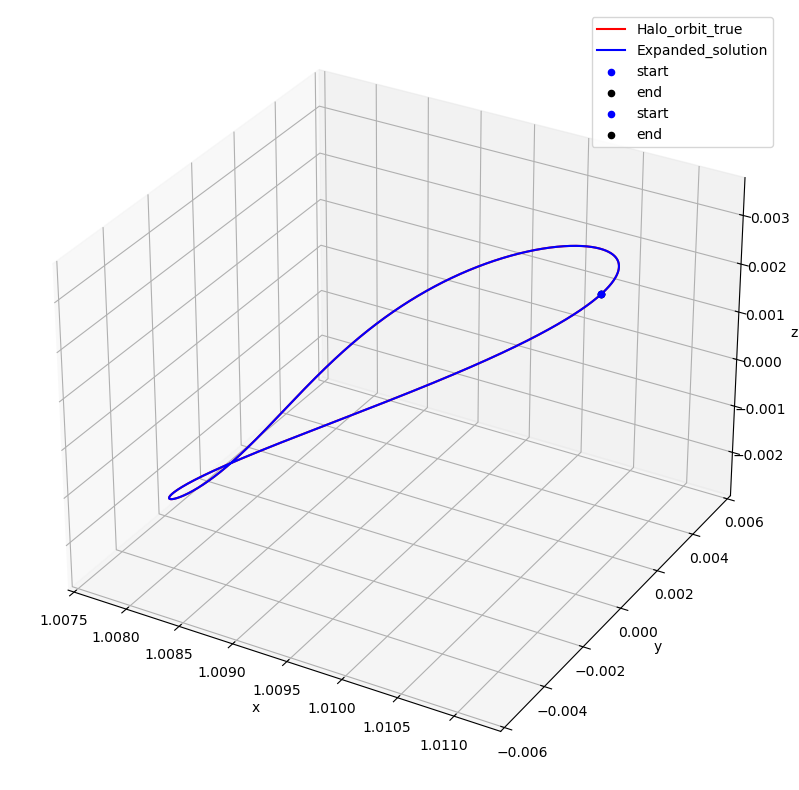

In [110]:
# plotting halo-orbit trajectory

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xb = rb[:,0]
yb = rb[:,1]
zb = rb[:,2]   

x = r[:,0]
y = r[:,1]
z = r[:,2] 
    

ax.plot(x,y,z, label='Halo_orbit_true', color='red')
ax.plot(xb,yb,zb, label='Expanded_solution', color='blue')

ax.scatter(x[0], y[0], z[0], color='blue', marker='o', label='start')
ax.scatter(x[-1], y[-1], z[-1], color='black', marker='o', label='end')

ax.scatter(xb[0], yb[0], zb[0], color='blue', marker='o', label='start')
ax.scatter(xb[-1], yb[-1], zb[-1], color='black', marker='o', label='end')

# Labels and legend

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.set_title('Halo_orbit_comparison')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [111]:
np.abs((xb-x)).max()

np.float64(3.1025697566633426e-09)

In [112]:
np.abs((yb-y)).max()

np.float64(5.387914195527366e-09)

In [113]:
np.abs((zb-z)).max()

np.float64(9.948172447491258e-10)

In [114]:
np.abs((Cbase-c_rk4)).max()

mpf('4.79896122840273e-10')

In [2]:
import mpmath as mp

mp.mp.dps = 12

# ---------- Problem data ----------
mu = mp.mpf('3.054200000000000e-6')

x0 = mp.mpf('1.0111555695836572')
z0 = mp.mpf('3.3421700407359777e-3')
yd0 = mp.mpf('-1.0398439218275901e-2')

T = mp.mpf('3.0913102168233957')

# ---------- Time grid ----------
N = 30
tgrid = [T*i/N for i in range(N)]

# ---------- Solve m from period ----------
def solve_m(lam, m_prev):
    target = lam*T/4
    f = lambda mm: mp.ellipk(mm) - target
    return mp.findroot(f, m_prev)

# ---------- CRTBP acceleration ----------
def crtbp_acc(x,y,z,xd,yd):

    r1 = mp.sqrt((x+mu)**2 + y**2 + z**2)
    r2 = mp.sqrt((x-1+mu)**2 + y**2 + z**2)

    ax = x + 2*yd \
        - (1-mu)*(x+mu)/r1**3 \
        - mu*(x-1+mu)/r2**3

    ay = y - 2*xd \
        - (1-mu)*y/r1**3 \
        - mu*y/r2**3

    az = -(1-mu)*z/r1**3 - mu*z/r2**3

    return ax, ay, az

# ---------- Residual vector ----------
def residual(theta, m_prev):

    (
        p, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13,
        f, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14,
        a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13,
        lam
    ) = theta

    m = solve_m(lam, m_prev)

    s = x0 - p - p2 - p3 - p4 - p5 - p6 - p7 - p8 - p9 - p10 - p11 - p12 - p13
    d = z0 - f - f2 - f3 - f4 - f5 - f6 - f7 - f8 - f9 - f10 - f11 -f12 -f13 -f14
    a = (yd0/lam) \
        - 2*a2 - 3*a3 - 4*a4 - 5*a5 - 6*a6 \
        - 7*a7 - 8*a8 - 9*a9 - 10*a10 -11*a11 - 12*a12 -13*a13

    R = []

    for t in tgrid:

        u1  = lam*t
        u2  = 2*lam*t
        u3  = 3*lam*t
        u4  = 4*lam*t
        u5  = 5*lam*t
        u6  = 6*lam*t
        u7  = 7*lam*t
        u8  = 8*lam*t
        u9  = 9*lam*t
        u10 = 10*lam*t
        u11 = 11*lam*t
        u12 = 12*lam*t
        u13 = 13*lam*t
        u14 = 14*lam*t
        

        sn1,  cn1,  dn1  = mp.ellipfun('sn',u1,m),  mp.ellipfun('cn',u1,m),  mp.ellipfun('dn',u1,m)
        sn2,  cn2,  dn2  = mp.ellipfun('sn',u2,m),  mp.ellipfun('cn',u2,m),  mp.ellipfun('dn',u2,m)
        sn3,  cn3,  dn3  = mp.ellipfun('sn',u3,m),  mp.ellipfun('cn',u3,m),  mp.ellipfun('dn',u3,m)
        sn4,  cn4,  dn4  = mp.ellipfun('sn',u4,m),  mp.ellipfun('cn',u4,m),  mp.ellipfun('dn',u4,m)
        sn5,  cn5,  dn5  = mp.ellipfun('sn',u5,m),  mp.ellipfun('cn',u5,m),  mp.ellipfun('dn',u5,m)
        sn6,  cn6,  dn6  = mp.ellipfun('sn',u6,m),  mp.ellipfun('cn',u6,m),  mp.ellipfun('dn',u6,m)
        sn7,  cn7,  dn7  = mp.ellipfun('sn',u7,m),  mp.ellipfun('cn',u7,m),  mp.ellipfun('dn',u7,m)
        sn8,  cn8,  dn8  = mp.ellipfun('sn',u8,m),  mp.ellipfun('cn',u8,m),  mp.ellipfun('dn',u8,m)
        sn9,  cn9,  dn9  = mp.ellipfun('sn',u9,m),  mp.ellipfun('cn',u9,m),  mp.ellipfun('dn',u9,m)
        sn10, cn10, dn10 = mp.ellipfun('sn',u10,m), mp.ellipfun('cn',u10,m), mp.ellipfun('dn',u10,m)
        sn11, cn11, dn11 = mp.ellipfun('sn',u11,m), mp.ellipfun('cn',u11,m), mp.ellipfun('dn',u11,m)
        sn12, cn12, dn12 = mp.ellipfun('sn',u12,m), mp.ellipfun('cn',u12,m), mp.ellipfun('dn',u12,m)
        sn13, cn13, dn13 = mp.ellipfun('sn',u13,m), mp.ellipfun('cn',u13,m), mp.ellipfun('dn',u13,m)
        sn14, cn14, dn14 = mp.ellipfun('sn',u14,m), mp.ellipfun('cn',u14,m), mp.ellipfun('dn',u14,m)

        # ---------- positions ----------
        x = s + p*cn1 + p2*cn2 + p3*cn3 + p4*cn4 + p5*cn5 + p6*cn6 + p7*cn7 + p8*cn8 + p9*cn9 + p10*cn10 +p11*cn11+p12*cn12+p13*cn13
        y = a*sn1 + a2*sn2 + a3*sn3 + a4*sn4 + a5*sn5 + a6*sn6 + a7*sn7 + a8*sn8 + a9*sn9 + a10*sn10+ a11*sn11+ a12*sn12+ a13*sn13
        z = d + f*cn1 + f2*cn2 + f3*cn3 + f4*cn4 + f5*cn5 + f6*cn6 + f7*cn7 + f8*cn8 + f9*cn9 + f10*cn10 + f11*cn11+ f12*cn12+ f13*cn13+ f14*cn14

        # ---------- velocities ----------
        xd = -lam*(p*sn1*dn1 + 2*p2*sn2*dn2 + 3*p3*sn3*dn3 + 4*p4*sn4*dn4 + 5*p5*sn5*dn5 +
                   6*p6*sn6*dn6 + 7*p7*sn7*dn7 + 8*p8*sn8*dn8 + 9*p9*sn9*dn9 + 10*p10*sn10*dn10+ 11*p11*sn11*dn11+ 12*p12*sn12*dn12+ 13*p13*sn13*dn13)

        yd = lam*(a*cn1*dn1 + 2*a2*cn2*dn2 + 3*a3*cn3*dn3 + 4*a4*cn4*dn4 + 5*a5*cn5*dn5 +
                  6*a6*cn6*dn6 + 7*a7*cn7*dn7 + 8*a8*cn8*dn8 + 9*a9*cn9*dn9 + 10*a10*cn10*dn10+ 11*a11*cn11*dn11+ 12*a12*cn12*dn12+ 13*a13*cn13*dn13)

        zd = -lam*(f*sn1*dn1 + 2*f2*sn2*dn2 + 3*f3*sn3*dn3 + 4*f4*sn4*dn4 + 5*f5*sn5*dn5 +
                   6*f6*sn6*dn6 + 7*f7*sn7*dn7 + 8*f8*sn8*dn8 + 9*f9*sn9*dn9 + 10*f10*sn10*dn10 + 11*f11*sn11*dn11+ 12*f12*sn12*dn12+ 13*f13*sn13*dn13+ 14*f14*sn14*dn14)

        # ---------- accelerations (FULLY EXTENDED) ----------
        xdd = (
            - (lam**2) * (
                p*cn1*((dn1**2) - m*sn1**2)
              + 4*p2*cn2*((dn2**2) - m*sn2**2)
              + 9*p3*cn3*((dn3**2) - m*sn3**2)
              + 16*p4*cn4*((dn4**2) - m*sn4**2)
              + 25*p5*cn5*((dn5**2) - m*sn5**2)
              + 36*p6*cn6*((dn6**2) - m*sn6**2)
              + 49*p7*cn7*((dn7**2) - m*sn7**2)
              + 64*p8*cn8*((dn8**2) - m*sn8**2)
              + 81*p9*cn9*((dn9**2) - m*sn9**2)
              + 100*p10*cn10*((dn10**2) - m*sn10**2)
              + 121*p11*cn11*((dn11**2) - m*sn11**2)
              + 144*p12*cn12*((dn12**2) - m*sn12**2)
              + 169*p13*cn13*((dn13**2) - m*sn13**2)
            )
        )

        ydd = (
            - (lam**2) * (
                a*sn1*((dn1**2) + m*cn1**2)
              + 4*a2*sn2*((dn2**2) + m*cn2**2)
              + 9*a3*sn3*((dn3**2) + m*cn3**2)
              + 16*a4*sn4*((dn4**2) + m*cn4**2)
              + 25*a5*sn5*((dn5**2) + m*cn5**2)
              + 36*a6*sn6*((dn6**2) + m*cn6**2)
              + 49*a7*sn7*((dn7**2) + m*cn7**2)
              + 64*a8*sn8*((dn8**2) + m*cn8**2)
              + 81*a9*sn9*((dn9**2) + m*cn9**2)
              + 100*a10*sn10*((dn10**2) + m*cn10**2)
              + 121*a11*sn11*((dn11**2) + m*cn11**2)
              + 144*a12*sn12*((dn12**2) + m*cn12**2)
              + 169*a13*sn13*((dn13**2) + m*cn13**2)
            )
        )

        zdd = (
            - (lam**2) * (
                f*cn1*((dn1**2) - m*sn1**2)
              + 4*f2*cn2*((dn2**2) - m*sn2**2)
              + 9*f3*cn3*((dn3**2) - m*sn3**2)
              + 16*f4*cn4*((dn4**2) - m*sn4**2)
              + 25*f5*cn5*((dn5**2) - m*sn5**2)
              + 36*f6*cn6*((dn6**2) - m*sn6**2)
              + 49*f7*cn7*((dn7**2) - m*sn7**2)
              + 64*f8*cn8*((dn8**2) - m*sn8**2)
              + 81*f9*cn9*((dn9**2) - m*sn9**2)
              + 100*f10*cn10*((dn10**2) - m*sn10**2)
              + 121*f11*cn11*((dn11**2) - m*sn11**2)
              + 144*f12*cn12*((dn12**2) - m*sn12**2)
              + 169*f13*cn13*((dn13**2) - m*sn13**2)
              + 196*f14*cn14*((dn14**2) - m*sn14**2)
            )
        )

        ax, ay, az = crtbp_acc(x,y,z,xd,yd)

        R.append(xdd - ax)
        R.append(ydd - ay)
        R.append(zdd - az)

    return mp.matrix(R), m

# ---------- Jacobian ----------
def jacobian(theta, m_prev):

    eps = mp.mpf('1e-6')

    R0, m_new = residual(theta, m_prev)

    mR = len(R0)
    n = len(theta)

    J = mp.zeros(mR, n)

    for j in range(n):
        step = eps*(1+abs(theta[j]))
        tp = list(theta)
        tp[j] += step
        Rp, _ = residual(tp, m_new)
        for i in range(mR):
            J[i,j] = (Rp[i] - R0[i]) / step

    return J, R0, m_new

# ---------- Gauss–Newton loop ----------

theta = mp.matrix([
    mp.mpf('0.00175768630107'),         # p
    mp.mpf('0.000160278553571'),        # p2
    mp.mpf('-2.59836023953e-5'),        # p3
    mp.mpf('5.83972123463e-6'),         # p4
    mp.mpf('-1.33082382224e-6'),        # p5
    mp.mpf('3.01062036278e-7'),         # p6
    mp.mpf('0.0'),                      # p7
    mp.mpf('0.0'),                      # p8
    mp.mpf('0.0'),                      # p9
    mp.mpf('0.0'),                      # p10
    mp.mpf('0.0'),                      # p11
    mp.mpf('0.0'),                      # p12
    mp.mpf('0.0'),                      # p13

    mp.mpf('0.00289861200688'),       # f
    mp.mpf('-0.000191957326079'),     # f2
    mp.mpf('3.16085711088e-5'),       # f3
    mp.mpf('-6.15446699732e-6'),      # f4
    mp.mpf('1.34678639648e-6'),       # f5
    mp.mpf('-2.84010566069e-7'),      # f6
    mp.mpf('7.64676402887e-8'),       # f7
    mp.mpf('0.0'),                    # f8
    mp.mpf('0.0'),                    # f9
    mp.mpf('0.0'),                    # f10
    mp.mpf('0.0'),                    # f11
    mp.mpf('0.0'),                    # f12
    mp.mpf('0.0'),                    # f13
    mp.mpf('0.0'),                    # f14

    mp.mpf('0.000202250495678'),        # a2
    mp.mpf('-3.99100273899e-5'),        # a3
    mp.mpf('8.01533814021e-6'),         # a4
    mp.mpf('-1.81063310189e-6'),        # a5
    mp.mpf('3.90582306773e-7'),         # a6
    mp.mpf('0.0'),                      # a7
    mp.mpf('0.0'),                      # a8
    mp.mpf('0.0'),                      # a9
    mp.mpf('0.0'),                      # a10
    mp.mpf('0.0'),                      # a11
    mp.mpf('0.0'),                      # a12
    mp.mpf('0.0'),                      # a13

    mp.mpf('2.03382749915')            # lambda
])

m_current = mp.mpf('0.00254654532519')

for k in range(50):

    J, R, m_current = jacobian(theta, m_current)

    JT = J.transpose()
    H = JT*J
    g = JT*R

    delta = mp.lu_solve(H, g)
    theta = theta - 0.7*delta

    cost = mp.fsum(r*r for r in R)

    print("Iter", k, "cost =", cost,
          "lambda =", theta[-1],
          "m =", m_current)

print("\nOptimized parameters:")
print(theta)
print("Final m =", m_current)


Iter 0 cost = 1.61997844796e-8 lambda = 0.0 m = 0.00254691104881
Iter 1 cost = 1.45812739717e-9 lambda = 0.0 m = 0.000792641000278
Iter 2 cost = 1.31238931817e-10 lambda = 0.0 m = 0.000255790119852
Iter 3 cost = 1.18141076318e-11 lambda = 0.0 m = 9.41453282923e-5
Iter 4 cost = 1.06499113386e-12 lambda = 0.0 m = 4.57919242417e-5
Iter 5 cost = 9.75377955596e-14 lambda = 0.0 m = 3.13207702112e-5
Iter 6 cost = 1.046525725e-14 lambda = 0.0 m = 2.69667744884e-5
Iter 7 cost = 2.62739425235e-15 lambda = 0.0 m = 2.56744228587e-5
Iter 8 cost = 1.92194461595e-15 lambda = 0.0 m = 2.52448276085e-5
Iter 9 cost = 1.85869568797e-15 lambda = 0.0 m = 2.51510897918e-5
Iter 10 cost = 1.85284607306e-15 lambda = 0.0 m = 2.5105410117e-5
Iter 11 cost = 1.85247184844e-15 lambda = 0.0 m = 2.50617551537e-5
Iter 12 cost = 1.85230657582e-15 lambda = 0.0 m = 2.50661027595e-5
Iter 13 cost = 1.85198020325e-15 lambda = 0.0 m = 2.50530836806e-5
Iter 14 cost = 1.85217000177e-15 lambda = 0.0 m = 2.4996868192e-5
Iter 15 c

In [86]:
# p coefficients

p   = 0.00175737623867
p2  = 0.000160190075551
p3  = -2.56912724707e-5
p4  = 5.83087906939e-6
p5  = -1.32370719315e-6
p6  = 3.19199753082e-7
p7  = -7.95068475165e-8
p8  = 2.03396692265e-8
p9  = -5.27020585585e-9
p10 = 1.41053822326e-9
p11 = -3.79838454368e-10
p12 = 9.31364683823e-11
p13 = -2.88972296586e-11

# f coefficients

f   = 0.00289816902366
f2  = -0.000191904682108
f3  = 3.2054794442e-5
f4  = -6.14962012672e-6
f5  = 1.34388568645e-6
f6  = -3.11911348523e-7
f7  = 7.60263071128e-8
f8  = -1.91219018767e-8
f9  = 4.88021142496e-9
f10 = -1.29663544853e-9
f11 = 3.46388815093e-10
f12 = -8.30829468706e-11
f13 = 2.59372264332e-11
f14 = -7.8089727654e-12

# a coefficients

a2  = 0.00020234593814
a3  = -4.07722801414e-5
a4  = 8.02836414116e-6
a5  = -1.81733729533e-6
a6  = 4.30481549565e-7
a7  = -1.06580346817e-7
a8  = 2.71249810895e-8
a9  = -6.99773131489e-9
a10 = 1.8705581722e-9
a11 = -5.02618820373e-10
a12 = 1.25612871185e-10
a13 = -3.7031211996e-11


lamda = 2.03254422929
m = 2.50831365269e-5


s = x0 - p - p2 - p3 - p4 - p5 - p6 - p7 - p8 - p9 - p10 - p11 - p12 - p13 
a = (yd0/lamda) - 2*a2 - 3*a3 - 4*a4 - 5*a5 - 6*a6 - 7*a7 - 8*a8 - 9*a9 - 10*a10 - 11*a11 - 12*a12 - 13*a13 
d = z0 - f - f2 - f3 - f4 - f5 - f6 - f7 - f8 - f9 - f10 - f11 - f12 - f13 - f14 

rb = []
timeb = []
Cbase = []

for t in (np.arange(0,t_final,h)):

    xb = ( s
       + p  * float(mp.re(mp.ellipfun('cn', 1  * lamda * t, m)))
       + p2 * float(mp.re(mp.ellipfun('cn', 2  * lamda * t, m)))
       + p3 * float(mp.re(mp.ellipfun('cn', 3  * lamda * t, m)))
       + p4 * float(mp.re(mp.ellipfun('cn', 4  * lamda * t, m)))
       + p5 * float(mp.re(mp.ellipfun('cn', 5  * lamda * t, m)))
       + p6 * float(mp.re(mp.ellipfun('cn', 6  * lamda * t, m)))
       + p7 * float(mp.re(mp.ellipfun('cn', 7  * lamda * t, m)))
       + p8 * float(mp.re(mp.ellipfun('cn', 8  * lamda * t, m)))
       + p9 * float(mp.re(mp.ellipfun('cn', 9  * lamda * t, m)))
       + p10* float(mp.re(mp.ellipfun('cn', 10 * lamda * t, m)))
       + p11* float(mp.re(mp.ellipfun('cn', 11 * lamda * t, m)))
       + p12* float(mp.re(mp.ellipfun('cn', 12 * lamda * t, m)))
       + p13* float(mp.re(mp.ellipfun('cn', 13 * lamda * t, m)))
     
         )

    yb = ( a  * float(mp.re(mp.ellipfun('sn', 1  * lamda * t, m)))
       + a2 * float(mp.re(mp.ellipfun('sn', 2  * lamda * t, m)))
       + a3 * float(mp.re(mp.ellipfun('sn', 3  * lamda * t, m)))
       + a4 * float(mp.re(mp.ellipfun('sn', 4  * lamda * t, m)))
       + a5 * float(mp.re(mp.ellipfun('sn', 5  * lamda * t, m)))
       + a6 * float(mp.re(mp.ellipfun('sn', 6  * lamda * t, m)))
       + a7 * float(mp.re(mp.ellipfun('sn', 7  * lamda * t, m)))
       + a8 * float(mp.re(mp.ellipfun('sn', 8  * lamda * t, m)))
       + a9 * float(mp.re(mp.ellipfun('sn', 9  * lamda * t, m)))
       + a10* float(mp.re(mp.ellipfun('sn', 10 * lamda * t, m)))
       + a11* float(mp.re(mp.ellipfun('sn', 11 * lamda * t, m)))
       + a12* float(mp.re(mp.ellipfun('sn', 12 * lamda * t, m)))
       + a13* float(mp.re(mp.ellipfun('sn', 13 * lamda * t, m)))
     
         )
    
    zb = ( d
       + f  * float(mp.re(mp.ellipfun('cn', 1  * lamda * t, m)))
       + f2 * float(mp.re(mp.ellipfun('cn', 2  * lamda * t, m)))
       + f3 * float(mp.re(mp.ellipfun('cn', 3  * lamda * t, m)))
       + f4 * float(mp.re(mp.ellipfun('cn', 4  * lamda * t, m)))
       + f5 * float(mp.re(mp.ellipfun('cn', 5  * lamda * t, m)))
       + f6 * float(mp.re(mp.ellipfun('cn', 6  * lamda * t, m)))
       + f7 * float(mp.re(mp.ellipfun('cn', 7  * lamda * t, m)))
       + f8 * float(mp.re(mp.ellipfun('cn', 8  * lamda * t, m)))
       + f9 * float(mp.re(mp.ellipfun('cn', 9  * lamda * t, m)))
       + f10* float(mp.re(mp.ellipfun('cn', 10 * lamda * t, m)))
       + f11* float(mp.re(mp.ellipfun('cn', 11 * lamda * t, m)))
       + f12* float(mp.re(mp.ellipfun('cn', 12 * lamda * t, m)))
       + f13* float(mp.re(mp.ellipfun('cn', 13 * lamda * t, m)))
       + f14* float(mp.re(mp.ellipfun('cn', 14 * lamda * t, m)))
  
         )

    xbd = ( -1  * p  * lamda * float(mp.re(mp.ellipfun('sn', 1  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 1  * lamda * t, m)))
            -2  * p2 * lamda * float(mp.re(mp.ellipfun('sn', 2  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 2  * lamda * t, m)))
            -3  * p3 * lamda * float(mp.re(mp.ellipfun('sn', 3  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 3  * lamda * t, m)))
            -4  * p4 * lamda * float(mp.re(mp.ellipfun('sn', 4  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 4  * lamda * t, m)))
            -5  * p5 * lamda * float(mp.re(mp.ellipfun('sn', 5  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 5  * lamda * t, m)))
            -6  * p6 * lamda * float(mp.re(mp.ellipfun('sn', 6  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 6  * lamda * t, m)))
            -7  * p7 * lamda * float(mp.re(mp.ellipfun('sn', 7  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 7  * lamda * t, m)))
            -8  * p8 * lamda * float(mp.re(mp.ellipfun('sn', 8  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 8  * lamda * t, m)))
            -9  * p9 * lamda * float(mp.re(mp.ellipfun('sn', 9  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 9  * lamda * t, m)))
            -10 * p10* lamda * float(mp.re(mp.ellipfun('sn', 10 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 10 * lamda * t, m)))
            -11 * p11* lamda * float(mp.re(mp.ellipfun('sn', 11 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 11 * lamda * t, m)))
            -12 * p12* lamda * float(mp.re(mp.ellipfun('sn', 12 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 12 * lamda * t, m)))
            -13 * p13* lamda * float(mp.re(mp.ellipfun('sn', 13 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 13 * lamda * t, m)))
       
         )

    ybd = (  1  * a  * lamda * float(mp.re(mp.ellipfun('cn', 1  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 1  * lamda * t, m)))
            +2  * a2 * lamda * float(mp.re(mp.ellipfun('cn', 2  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 2  * lamda * t, m)))
            +3  * a3 * lamda * float(mp.re(mp.ellipfun('cn', 3  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 3  * lamda * t, m)))
            +4  * a4 * lamda * float(mp.re(mp.ellipfun('cn', 4  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 4  * lamda * t, m)))
            +5  * a5 * lamda * float(mp.re(mp.ellipfun('cn', 5  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 5  * lamda * t, m)))
            +6  * a6 * lamda * float(mp.re(mp.ellipfun('cn', 6  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 6  * lamda * t, m)))
            +7  * a7 * lamda * float(mp.re(mp.ellipfun('cn', 7  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 7  * lamda * t, m)))
            +8  * a8 * lamda * float(mp.re(mp.ellipfun('cn', 8  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 8  * lamda * t, m)))
            +9  * a9 * lamda * float(mp.re(mp.ellipfun('cn', 9  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 9  * lamda * t, m)))
            +10 * a10* lamda * float(mp.re(mp.ellipfun('cn', 10 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 10 * lamda * t, m)))
            +11 * a11* lamda * float(mp.re(mp.ellipfun('cn', 11 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 11 * lamda * t, m)))
            +12 * a12* lamda * float(mp.re(mp.ellipfun('cn', 12 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 12 * lamda * t, m)))
            +13 * a13* lamda * float(mp.re(mp.ellipfun('cn', 13 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 13 * lamda * t, m)))
         
        )

    zbd = ( -1  * f  * lamda * float(mp.re(mp.ellipfun('sn', 1  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 1  * lamda * t, m)))
            -2  * f2 * lamda * float(mp.re(mp.ellipfun('sn', 2  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 2  * lamda * t, m)))
            -3  * f3 * lamda * float(mp.re(mp.ellipfun('sn', 3  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 3  * lamda * t, m)))
            -4  * f4 * lamda * float(mp.re(mp.ellipfun('sn', 4  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 4  * lamda * t, m)))
            -5  * f5 * lamda * float(mp.re(mp.ellipfun('sn', 5  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 5  * lamda * t, m)))
            -6  * f6 * lamda * float(mp.re(mp.ellipfun('sn', 6  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 6  * lamda * t, m)))
            -7  * f7 * lamda * float(mp.re(mp.ellipfun('sn', 7  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 7  * lamda * t, m)))
            -8  * f8 * lamda * float(mp.re(mp.ellipfun('sn', 8  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 8  * lamda * t, m)))
            -9  * f9 * lamda * float(mp.re(mp.ellipfun('sn', 9  * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 9  * lamda * t, m)))
            -10 * f10* lamda * float(mp.re(mp.ellipfun('sn', 10 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 10 * lamda * t, m)))
            -11 * f11* lamda * float(mp.re(mp.ellipfun('sn', 11 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 11 * lamda * t, m)))
            -12 * f12* lamda * float(mp.re(mp.ellipfun('sn', 12 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 12 * lamda * t, m)))
            -13 * f13* lamda * float(mp.re(mp.ellipfun('sn', 13 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 13 * lamda * t, m)))
            -14 * f14* lamda * float(mp.re(mp.ellipfun('sn', 14 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 14 * lamda * t, m)))
       
          )

    rho1b = np.sqrt(((xb+mu2)**2)+(yb**2)+(zb**2))

    rho2b = np.sqrt(((xb-1+mu2)**2)+(yb**2)+(zb**2))

    Cb = (xb**2) + (yb**2) + ((2*mu1)/(rho1b)) + ((2*mu2)/(rho2b)) - ((xbd**2)+(ybd**2)+(zbd**2))

    Cbase.append(Cb)
    rb.append([xb,yb,zb])
    timeb.append(t)
    
    
Cbase = np.array(Cbase)
rb = np.array(rb)  
timeb = np.array(timeb)

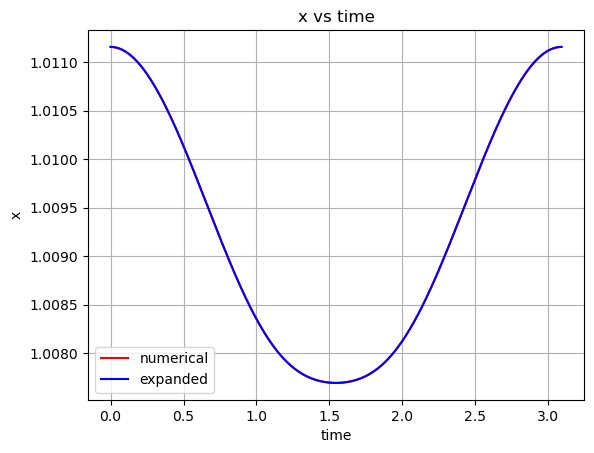

In [87]:
plt.figure()
plt.plot(time ,r[:,0],label='numerical', color='r')
plt.plot(timeb ,rb[:,0],label='expanded',color='b')
plt.xlabel("time")
plt.ylabel("x")
plt.title("x vs time")
plt.grid()
plt.legend()
plt.show()

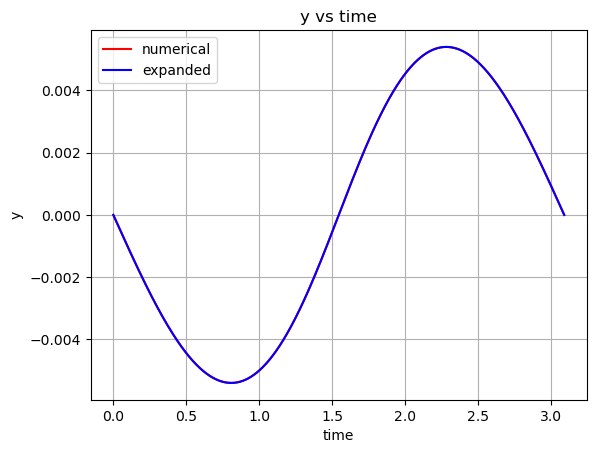

In [88]:
plt.figure()
plt.plot(time ,r[:,1],label='numerical', color='r')
plt.plot(timeb ,rb[:,1],label='expanded',color='b')
plt.xlabel("time")
plt.ylabel("y")
plt.title("y vs time")
plt.grid()
plt.legend()
plt.show()

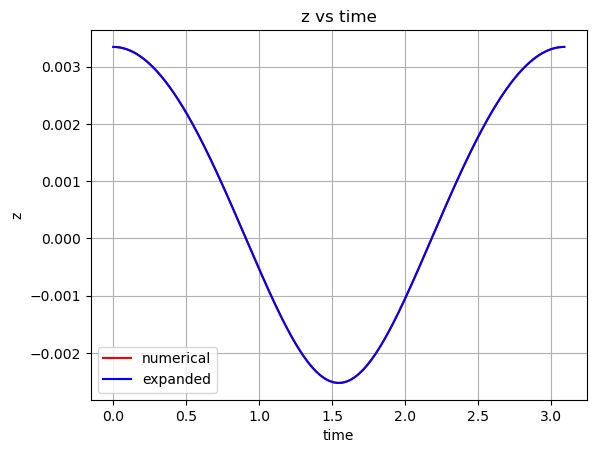

In [89]:
plt.figure()
plt.plot(time ,r[:,2],label='numerical', color='r')
plt.plot(timeb ,rb[:,2],label='expanded',color='b')
plt.xlabel("time")
plt.ylabel("z")
plt.title("z vs time")
plt.grid()
plt.legend()
plt.show()

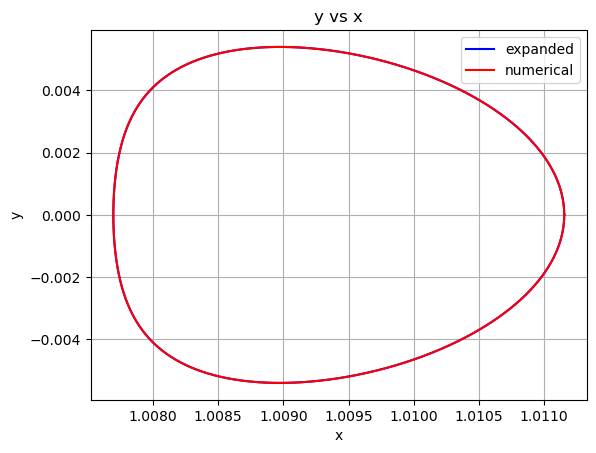

In [90]:
plt.figure()
plt.plot(rb[:,0] ,rb[:,1],label='expanded',color='b')
plt.plot(r[:,0] ,r[:,1],label='numerical', color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("y vs x")
plt.grid()
plt.legend()
plt.show()

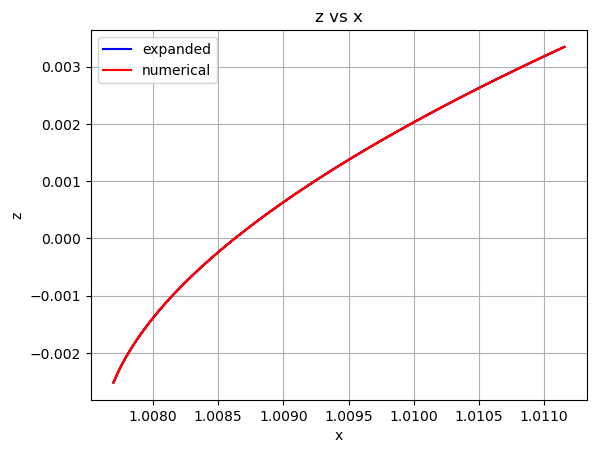

In [91]:
plt.figure()
plt.plot(rb[:,0] ,rb[:,2],label='expanded',color='b')
plt.plot(r[:,0] ,r[:,2],label='numerical', color='r')
plt.xlabel("x")
plt.ylabel("z")
plt.title("z vs x")
plt.grid()
plt.legend()
plt.show()

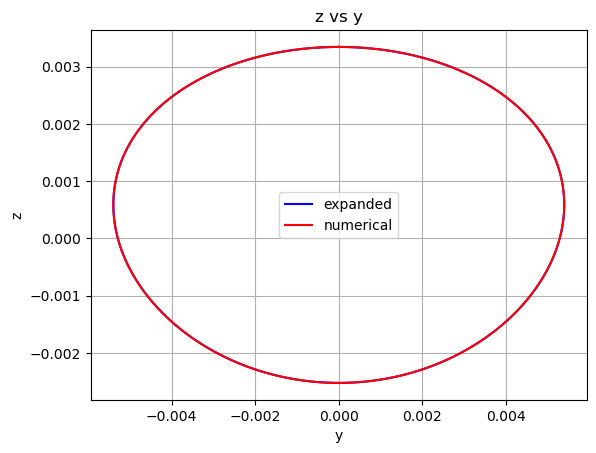

In [92]:
plt.figure()
plt.plot(rb[:,1] ,rb[:,2],label='expanded',color='b')
plt.plot(r[:,1] ,r[:,2],label='numerical', color='r')
plt.xlabel("y")
plt.ylabel("z")
plt.title("z vs y")
plt.grid()
plt.legend()
plt.show()

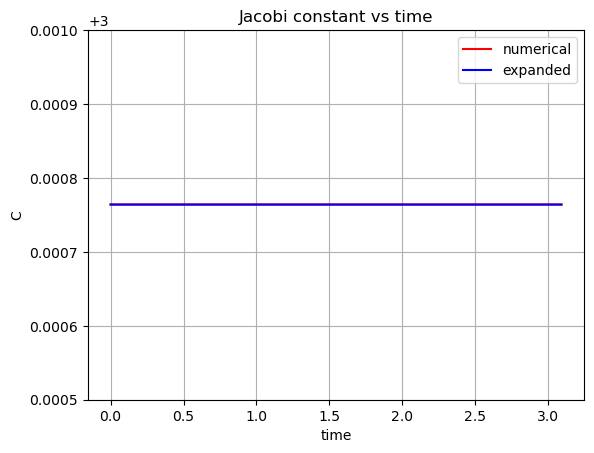

In [93]:
plt.figure()
plt.plot(time ,c_rk4, label='numerical', color='r')
plt.plot(timeb ,Cbase, label='expanded',color='b')
plt.xlabel("time")
plt.ylabel("C")
plt.title("Jacobi constant vs time")
plt.legend()
plt.ylim(3.0005, 3.001)
plt.grid()
plt.show()

In [94]:
rb=rb.astype(float)

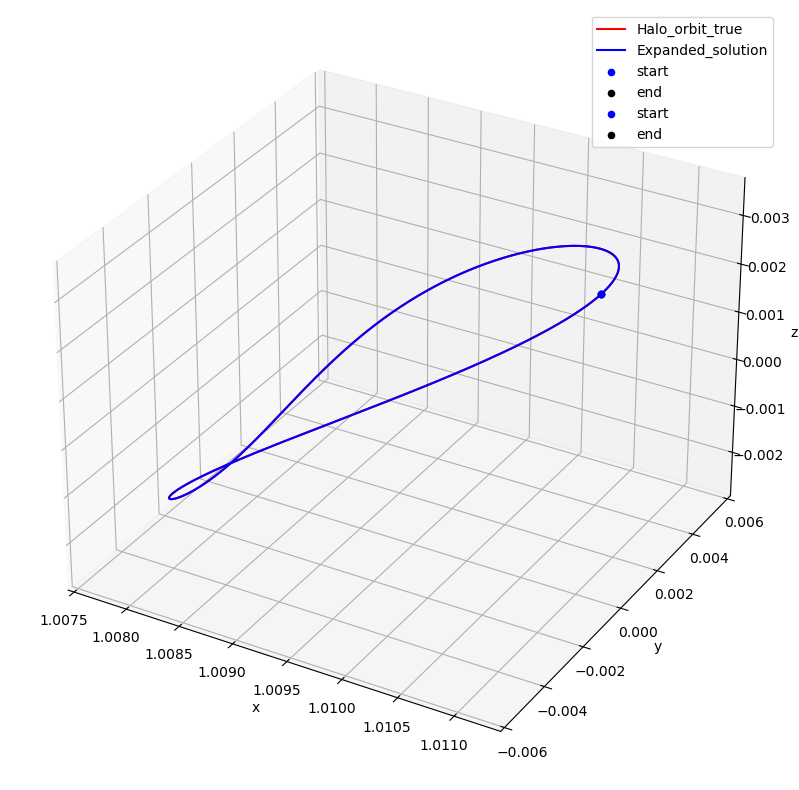

In [95]:
# plotting halo-orbit trajectory

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xb = rb[:,0]
yb = rb[:,1]
zb = rb[:,2]   

x = r[:,0]
y = r[:,1]
z = r[:,2] 
    

ax.plot(x,y,z, label='Halo_orbit_true', color='red')
ax.plot(xb,yb,zb, label='Expanded_solution', color='blue')

ax.scatter(x[0], y[0], z[0], color='blue', marker='o', label='start')
ax.scatter(x[-1], y[-1], z[-1], color='black', marker='o', label='end')

ax.scatter(xb[0], yb[0], zb[0], color='blue', marker='o', label='start')
ax.scatter(xb[-1], yb[-1], zb[-1], color='black', marker='o', label='end')

# Labels and legend

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.set_title('Halo_orbit_comparison')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [96]:
np.abs((xb-x)).max()

np.float64(1.0674772177310388e-10)

In [97]:
np.abs((yb-y)).max()

np.float64(2.1788154050059183e-10)

In [98]:
np.abs((zb-z)).max()

np.float64(6.356193024172063e-11)

In [99]:
np.abs((Cbase-c_rk4)).max()

mpf('1.16862075572044e-11')

In [100]:
time.shape

(30914,)

In [101]:
time[::60].shape

(516,)

In [102]:
# parameters for simulation

# downsample 

ds = 60

time_days = time[::ds]       # (N,) time array in days

r_true = r[::ds]                  # (N,3) numerical halo orbit [x,y,z]
r_ana = rb[::ds]                  # (N,3) semi-analytical halo orbit [x,y,z]

CJ_true = c_rk4[::ds]             # (N,) Jacobi constant (true)
CJ_ana = Cbase[::ds]            # (N,) Jacobi constant (analytical)

# Scalars for info block
IC_true = np.array([1.0111555695836572, 0, 3.3421700407359777e-3, 0, -1.0398439218275901e-2, 0 ])          # array-like [x0,y0,z0,xd0,yd0,zd0]
CJ0_true = c                    # float
period_days = t_final           # float


In [103]:
r_true.shape

(516, 3)

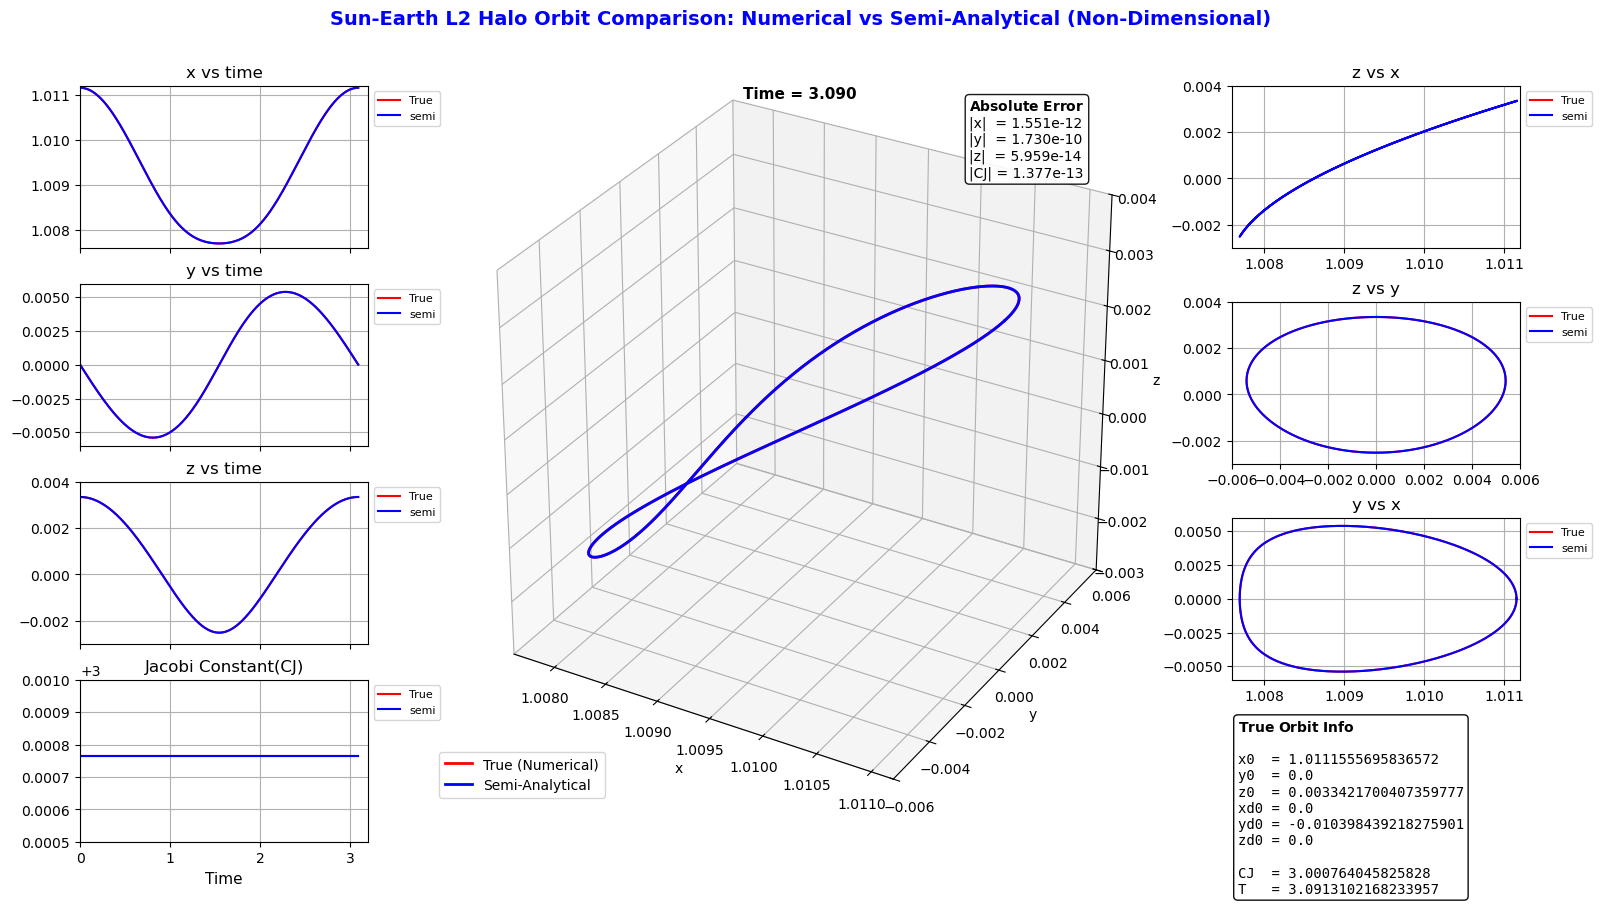

In [104]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from matplotlib.lines import Line2D

# =================================================
# INPUT DATA (ASSUMED PROVIDED)
# =================================================
xT, yT, zT = r_true.T
xA, yA, zA = r_ana.T

ex  = np.abs(np.array(xA - xT, dtype=float))
ey  = np.abs(np.array(yA - yT, dtype=float))
ez  = np.abs(np.array(zA - zT, dtype=float))
eCJ = np.abs(np.array(CJ_ana - CJ_true, dtype=float))

# =================================================
# FIGURE
# =================================================
fig = plt.figure(figsize=(16, 9))

fig.text(
    0.5, 0.985,
    "Sun-Earth L2 Halo Orbit Comparison: Numerical vs Semi-Analytical (Non-Dimensional)",
    ha="center", va="top",
    fontsize=14, fontweight="bold", color="blue"
)

# =================================================
# 3D AXIS
# =================================================
ax3d = fig.add_axes([0.27, 0.10, 0.46, 0.82], projection="3d")

line3d_true, = ax3d.plot([], [], [], 'r', lw=2, label="True (Numerical)")
line3d_ana,  = ax3d.plot([], [], [], 'b', lw=2, label="Semi-Analytical")

ax3d.set_xlabel("x")
ax3d.set_ylabel("y")
ax3d.set_zlabel("z")
ax3d.set_box_aspect([1,1,1])

# ---- FIXED 3D LIMITS ----
ax3d.set_xlim(1.0076, 1.0112)
ax3d.set_ylim(-0.006, 0.006)
ax3d.set_zlim(-0.003, 0.004)
ax3d.legend(loc="lower left")

# ---- persistent time text (NO fluctuation) ----
time_text = ax3d.text2D(
    0.5, 0.96, "",
    transform=ax3d.transAxes,
    ha="center", fontsize=11, fontweight="bold"
)

# ---- persistent error box ----
err_text = ax3d.text2D(
    0.73, 0.96, "",
    transform=ax3d.transAxes,
    va="top", fontsize=10,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.9)
)

# =================================================
# 2D AXES
# =================================================
# LHS axes (time-based)
axL1 = fig.add_axes([0.05, 0.72, 0.18, 0.18])
axL2 = fig.add_axes([0.05, 0.50, 0.18, 0.18])
axL3 = fig.add_axes([0.05, 0.28, 0.18, 0.18])
axL4 = fig.add_axes([0.05, 0.06, 0.18, 0.18])

# RHS axes (phase plots, adjusted positions)
axR1 = fig.add_axes([0.77, 0.72, 0.18, 0.18])  # z vs x
axR2 = fig.add_axes([0.77, 0.48, 0.18, 0.18])  # z vs y
axR3 = fig.add_axes([0.77, 0.24, 0.18, 0.18])  # y vs x
axR4 = fig.add_axes([0.77, 0.02, 0.18, 0.18])  # info

# =================================================
# 2D LINES + LEGENDS (short legend 'semi', outside)
# =================================================
def dual(ax):
    lT, = ax.plot([], [], 'r', lw=1.5, label="True")
    lA, = ax.plot([], [], 'b', lw=1.5, label="semi")
    ax.grid(True)
    ax.legend(fontsize=8, loc='upper right', bbox_to_anchor=(1.27, 1))
    return lT, lA

L1T,L1A = dual(axL1)
L2T,L2A = dual(axL2)
L3T,L3A = dual(axL3)
L4T,L4A = dual(axL4)

R1T,R1A = dual(axR1)
R2T,R2A = dual(axR2)
R3T,R3A = dual(axR3)

# =================================================
# TITLES
# =================================================
axL1.set_title("x vs time")
axL2.set_title("y vs time")
axL3.set_title("z vs time")
axL4.set_title("Jacobi Constant(CJ)")

axR1.set_title("z vs x")
axR2.set_title("z vs y")
axR3.set_title("y vs x")

# =================================================
# FIXED AXIS LIMITS (2D)
# =================================================
# LHS time-based
for ax in [axL1, axL2, axL3]:
    ax.set_xticklabels([])       # hide top LHS x-ticks

axL1.set_ylim(1.0076, 1.0112)
axL2.set_ylim(-0.006, 0.006)
axL3.set_ylim(-0.003, 0.004)
axL4.set_ylim(3.0005, 3.001)      # Jacobi constant
axL4.set_xlabel("Time", fontsize=11)
for ax in [axL1, axL2, axL3, axL4]:
    ax.set_xlim(0, 3.2)

# RHS 2D phase plots
axR1.set_xlim(1.0076, 1.0112); axR1.set_ylim(-0.003, 0.004)
axR2.set_xlim(-0.006, 0.006);  axR2.set_ylim(-0.003, 0.004)
axR3.set_xlim(1.0076, 1.0112); axR3.set_ylim(-0.006, 0.006)

# =================================================
# STATIC TRUE ORBIT INFO
# =================================================
axR4.axis("off")
info_text = (
    r"$\bf{True\ Orbit\ Info}$" "\n\n"
    f"x0  = {IC_true[0]}\n"
    f"y0  = {IC_true[1]}\n"
    f"z0  = {IC_true[2]}\n"
    f"xd0 = {IC_true[3]}\n"
    f"yd0 = {IC_true[4]}\n"
    f"zd0 = {IC_true[5]}\n\n"
    f"CJ  = {CJ0_true}\n"
    f"T   = {period_days}"
)
axR4.text(
    0.02, 0.98,
    info_text,
    va="top", fontsize=10,
    family="monospace",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.95)
)

# =================================================
# ANIMATION UPDATE
# =================================================
def update(k):

    line3d_true.set_data(xT[:k], yT[:k])
    line3d_true.set_3d_properties(zT[:k])

    line3d_ana.set_data(xA[:k], yA[:k])
    line3d_ana.set_3d_properties(zA[:k])

    # ---- Fixed 4-digit time ----
    time_text.set_text(f"Time = {time_days[k]:.3f}")

    err_text.set_text(
        r"$\bf{Absolute\ Error}$" "\n"
        f"|x|  = {ex[k]:.3e}\n"
        f"|y|  = {ey[k]:.3e}\n"
        f"|z|  = {ez[k]:.3e}\n"
        f"|CJ| = {eCJ[k]:.3e}"
    )

    t = time_days[:k+1]

    # LHS 2D plots
    L1T.set_data(t, xT[:k+1]); L1A.set_data(t, xA[:k+1])
    L2T.set_data(t, yT[:k+1]); L2A.set_data(t, yA[:k+1])
    L3T.set_data(t, zT[:k+1]); L3A.set_data(t, zA[:k+1])
    L4T.set_data(t, CJ_true[:k+1]); L4A.set_data(t, CJ_ana[:k+1])

    # RHS 2D plots
    R1T.set_data(xT[:k+1], zT[:k+1]); R1A.set_data(xA[:k+1], zA[:k+1])
    R2T.set_data(yT[:k+1], zT[:k+1]); R2A.set_data(yA[:k+1], zA[:k+1])
    R3T.set_data(xT[:k+1], yT[:k+1]); R3A.set_data(xA[:k+1], yA[:k+1])

    return []

# =================================================
# ANIMATION
# =================================================
fps = len(time_days) / 15
ani = FuncAnimation(fig, update, frames=len(time_days), interval=1000/fps)

writer = FFMpegWriter(fps=fps, bitrate=6000)
ani.save("halo_true_vs_semi_analytical.mp4", writer=writer, dpi=120)

plt.show()
